Dataset Information
Additional Information
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe characteristics of the cell nuclei present in the image. A few of the images can be found at http://www.cs.wisc.edu/~street/images/

Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree.  Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes.

The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import requests
import tensorflow as tf


In [2]:
# Download the data file
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
response = requests.get(url)

# Save the file locally
with open('wdbc.data', 'wb') as file:
    file.write(response.content)

# Define the column names
cols = ["ID number", "Diagnosis", "radius1", "texture1", "perimeter1", "area1", 
        "smoothness1", "compactness1", "concavity1", "concave_points1", "symmetry1",
        "fractal_dimension1", "radius2", "texture2", "perimeter2", "area2", "smoothness2",
        "compactness2", "concavity2", "concave_points2", "symmetry2", "fractal_dimension2",
        "radius3", "texture3", "perimeter3", "area3", "smoothness3", "compactness3",
        "concavity3", "concave_points3", "symmetry3", "fractal_dimension3"]

# Load the dataset into a pandas DataFrame
df = pd.read_csv('wdbc.data', names=cols)

# Display the first few rows of the dataframe
df.head()


ID number Diagnosis  radius1  texture1  perimeter1   area1  smoothness1  \
0     842302         M    17.99     10.38      122.80  1001.0      0.11840   
1     842517         M    20.57     17.77      132.90  1326.0      0.08474   
2   84300903         M    19.69     21.25      130.00  1203.0      0.10960   
3   84348301         M    11.42     20.38       77.58   386.1      0.14250   
4   84358402         M    20.29     14.34      135.10  1297.0      0.10030   

   compactness1  concavity1  concave_points1  ...  radius3  texture3  \
0       0.27760      0.3001          0.14710  ...    25.38     17.33   
1       0.07864      0.0869          0.07017  ...    24.99     23.41   
2       0.15990      0.1974          0.12790  ...    23.57     25.53   
3       0.28390      0.2414          0.10520  ...    14.91     26.50   
4       0.13280      0.1980          0.10430  ...    22.54     16.67   

   perimeter3   area3  smoothness3  compactness3  concavity3  concave_points3  \
0      184.60  2019.0       0.1622        0.6656      0.7119           0.2654   
1      158.80  1956.0       0.1238        0.1866      0.2416           0.1860   
2      152.50  1709.0       0.1444        0.4245      0.4504           0.2430   
3       98.87   567.7       0.2098        0.8663      0.6869           0.2575   
4      152.20  1575.0       0.1374        0.2050      0.4000           0.1625   

   symmetry3  fractal_dimension3  
0     0.4601             0.11890  
1     0.2750             0.08902  
2     0.3613             0.08758  
3     0.6638             0.17300  
4     0.2364             0.07678  

[5 rows x 32 columns]

In [3]:
diagnosis_counts = df['Diagnosis'].value_counts()
print(diagnosis_counts)


Diagnosis
B    357
M    212
Name: count, dtype: int64


NameError: name 'value_counts' is not defined

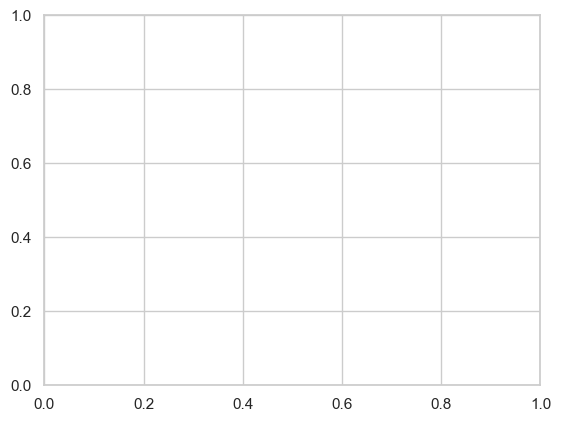

In [27]:
# Enhancing the bar chart with a light blue background

# Plotting the bar chart
fig, ax = plt.subplots()

# Plotting the bar chart with custom colors for the bars
value_counts.plot(kind='bar', color=colors, ax=ax)

# Setting a background color for the chart to light blue
ax.set_facecolor('#add8e6')  # light blue background

# Adding a grid for clarity
ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Rotating the x-axis labels to the right (45 degrees) for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=360, ha='right')

# Adding labels and title
ax.set_xlabel('Values', fontsize=12)
ax.set_ylabel('Counts', fontsize=12)
ax.set_title('Diagnosis', fontsize=14, fontweight='bold')

# Enhancing the layout for better visual appeal
plt.tight_layout()

# Showing the plot
plt.show()


In [5]:
# Convert the "Diagnosis" column to binary: 1 for "M" (Malignant), 0 for others (Benign)
df["Diagnosis"] = (df["Diagnosis"] == "M").astype(int)
df = df.drop(df.columns[[0,]], axis=1) #drop id column as is not useful  
df.head(500)

Diagnosis  radius1  texture1  perimeter1   area1  smoothness1  \
0            1    17.99     10.38      122.80  1001.0      0.11840   
1            1    20.57     17.77      132.90  1326.0      0.08474   
2            1    19.69     21.25      130.00  1203.0      0.10960   
3            1    11.42     20.38       77.58   386.1      0.14250   
4            1    20.29     14.34      135.10  1297.0      0.10030   
..         ...      ...       ...         ...     ...          ...   
495          0    14.87     20.21       96.12   680.9      0.09587   
496          0    12.65     18.17       82.69   485.6      0.10760   
497          0    12.47     17.31       80.45   480.1      0.08928   
498          1    18.49     17.52      121.30  1068.0      0.10120   
499          1    20.59     21.24      137.80  1320.0      0.10850   

     compactness1  concavity1  concave_points1  symmetry1  ...  radius3  \
0         0.27760     0.30010          0.14710     0.2419  ...    25.38   
1         0.07864     0.08690          0.07017     0.1812  ...    24.99   
2         0.15990     0.19740          0.12790     0.2069  ...    23.57   
3         0.28390     0.24140          0.10520     0.2597  ...    14.91   
4         0.13280     0.19800          0.10430     0.1809  ...    22.54   
..            ...         ...              ...        ...  ...      ...   
495       0.08345     0.06824          0.04951     0.1487  ...    16.01   
496       0.13340     0.08017          0.05074     0.1641  ...    14.38   
497       0.07630     0.03609          0.02369     0.1526  ...    14.06   
498       0.13170     0.14910          0.09183     0.1832  ...    22.75   
499       0.16440     0.21880          0.11210     0.1848  ...    23.86   

     texture3  perimeter3   area3  smoothness3  compactness3  concavity3  \
0       17.33      184.60  2019.0       0.1622        0.6656      0.7119   
1       23.41      158.80  1956.0       0.1238        0.1866      0.2416   
2       25.53      152.50  1709.0       0.1444        0.4245      0.4504   
3       26.50       98.87   567.7       0.2098        0.8663      0.6869   
4       16.67      152.20  1575.0       0.1374        0.2050      0.4000   
..        ...         ...     ...          ...           ...         ...   
495     28.48      103.90   783.6       0.1216        0.1388      0.1700   
496     22.15       95.29   633.7       0.1533        0.3842      0.3582   
497     24.34       92.82   607.3       0.1276        0.2506      0.2028   
498     22.88      146.40  1600.0       0.1412        0.3089      0.3533   
499     30.76      163.20  1760.0       0.1464        0.3597      0.5179   

     concave_points3  symmetry3  fractal_dimension3  
0             0.2654     0.4601             0.11890  
1             0.1860     0.2750             0.08902  
2             0.2430     0.3613             0.08758  
3             0.2575     0.6638             0.17300  
4             0.1625     0.2364             0.07678  
..               ...        ...                 ...  
495           0.1017     0.2369             0.06599  
496           0.1407     0.3230             0.10330  
497           0.1053     0.3035             0.07661  
498           0.1663     0.2510             0.09445  
499           0.2113     0.2480             0.08999  

[500 rows x 31 columns]

In [6]:
# Select only numerical columns and compute the correlation matrix
correlation_matrix = df.select_dtypes(include=np.number).corr()

plt.figure(figsize=(12, 10))

# Heatmap with smaller annotation values (smaller numbers)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            annot_kws={"size": 6}, linewidths=0.5, cbar_kws={"shrink": 0.8})

# Adjusting the font size for axis labels
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.title('Correlation Matrix', fontsize=15)

plt.show()


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame

# Select only numerical columns and compute the correlation matrix
correlation_matrix = df.select_dtypes(include=np.number).corr()

# Set the diagonal to NaN to ignore self-correlation
np.fill_diagonal(correlation_matrix.values, np.nan)

# Mask correlations with absolute value less than or equal to 0.9
mask = correlation_matrix.abs() < 0.8

# Apply the mask: set these values to NaN
correlation_matrix_masked = correlation_matrix.mask(mask)

# Identify columns that have at least one correlation greater than 0.9
cols_to_keep = correlation_matrix_masked.notna().any(axis=1)

# Filter the correlation matrix to keep only these columns and rows
filtered_correlation_matrix = correlation_matrix_masked.loc[cols_to_keep, cols_to_keep]

# Create the heatmap plot
plt.figure(figsize=(12, 10))
sns.heatmap(
    filtered_correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    annot_kws={"size": 8},
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    mask=filtered_correlation_matrix.isna()  # This masks the NaN values in the heatmap
)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title('Variables with High Correlation (|correlation| > 0.8)', fontsize=15)
plt.show()


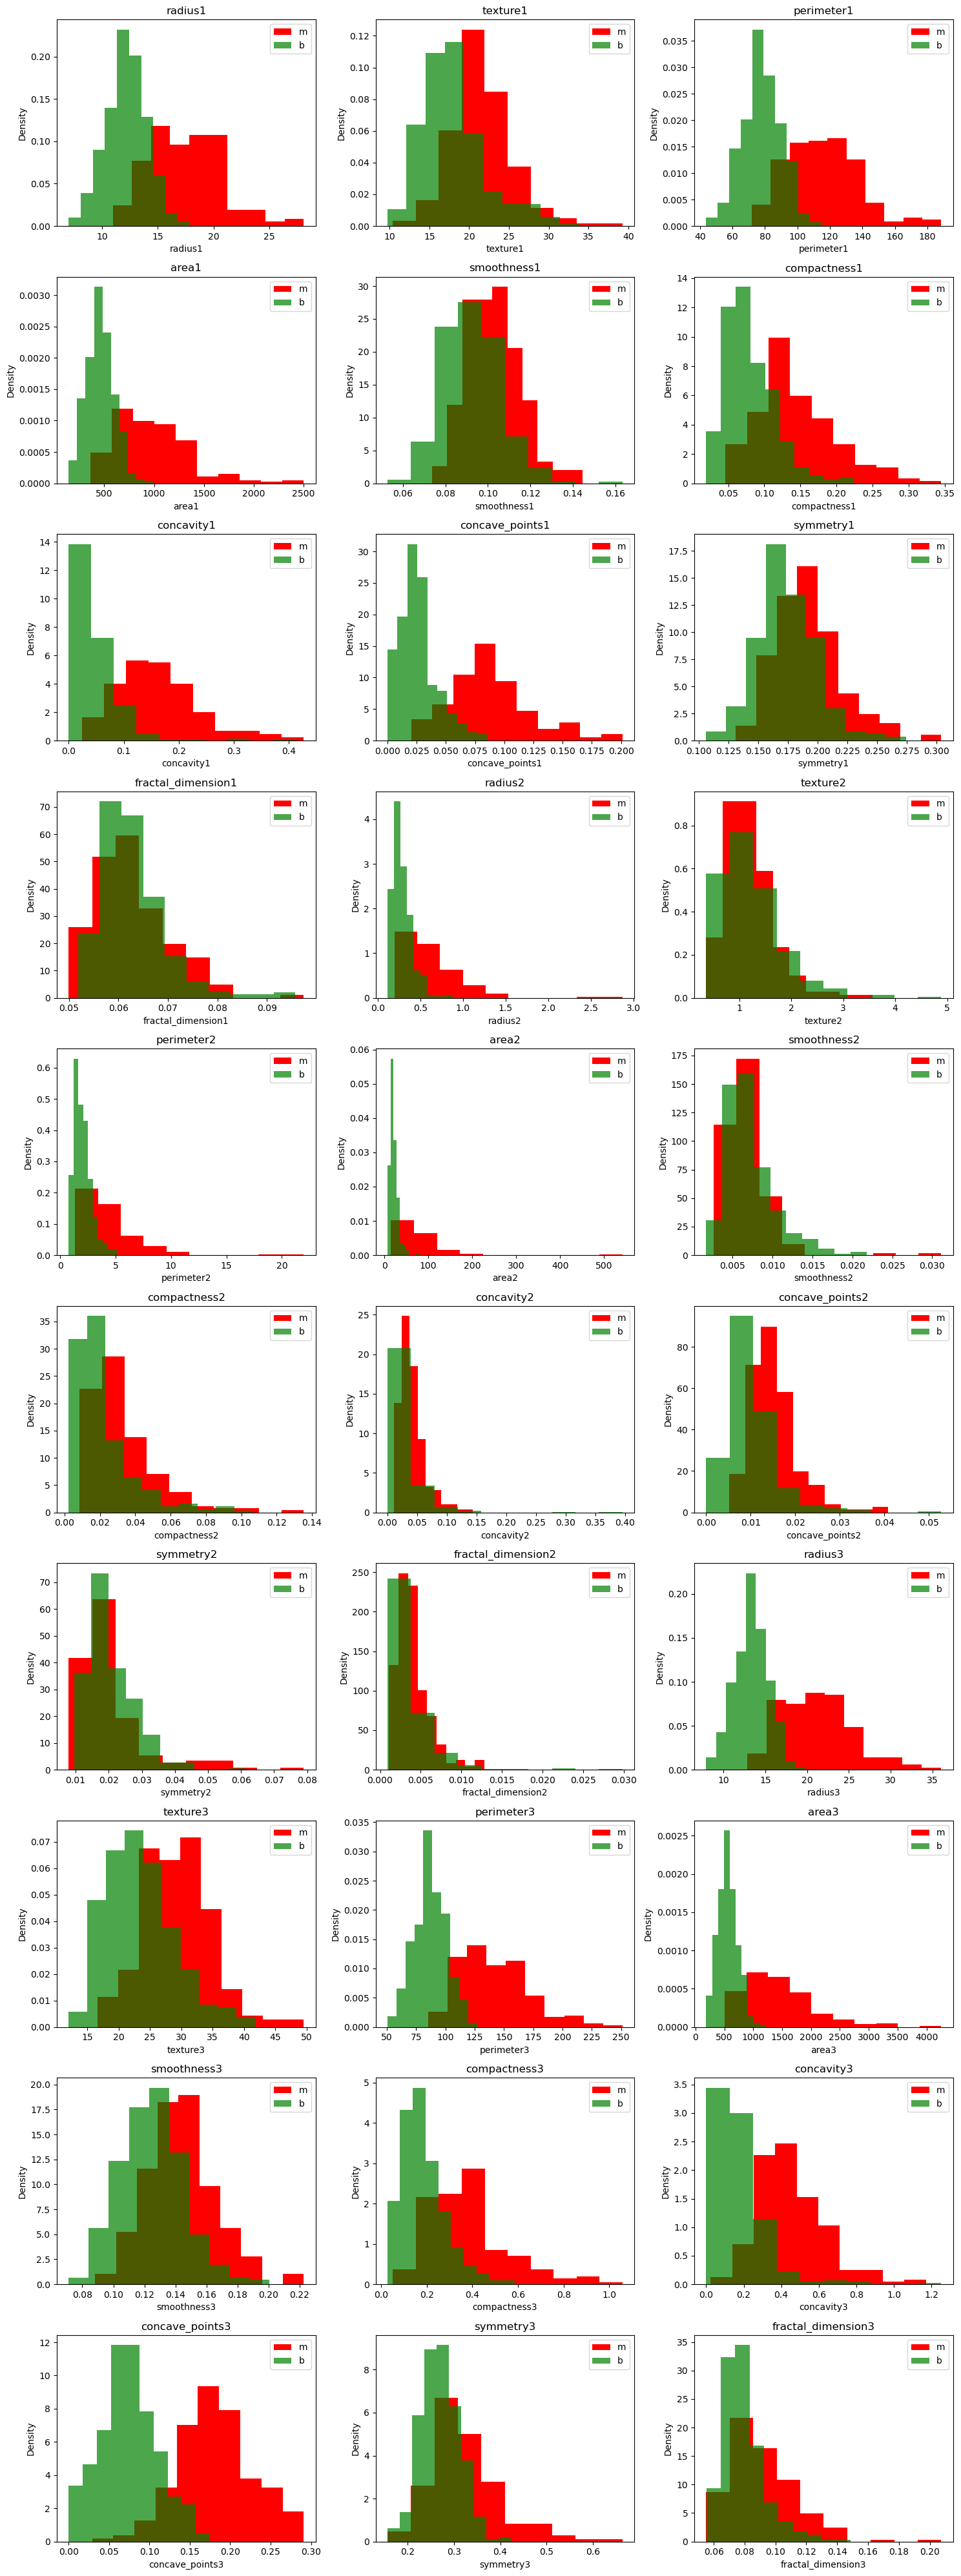

In [8]:
import matplotlib.pyplot as plt
import math

# Assuming 'cols' is your list of column names and 'df' is your DataFrame
# Determine the number of plots
num_plots = len(cols[2:])

# Define the number of columns per row in the grid
cols_per_row = 3  # You can adjust this based on your preference

# Calculate the number of rows needed
rows = math.ceil(num_plots / cols_per_row)

# Create subplots
fig, axes = plt.subplots(rows, cols_per_row, figsize=(5 * cols_per_row, 4 * rows))
axes = axes.flatten()  # Flatten in case of multiple rows and columns

# Iterate over each label and corresponding subplot axis
for i, label in enumerate(cols[2:]):
    ax = axes[i]
    # Plot histogram for Diagnosis == 1
    ax.hist(df[df["Diagnosis"] == 1][label], color="red", label="m", alpha=1, density=True)
    # Plot histogram for Diagnosis == 0
    ax.hist(df[df["Diagnosis"] == 0][label], color="green", label="b", alpha=0.7, density=True)
    
    # Set titles and labels
    ax.set_title(label)
    ax.set_xlabel(label)
    ax.set_ylabel("Density")
    
    # Add legend
    ax.legend()

# Remove any empty subplots if the total number isn't a perfect multiple
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()


In [ ]:
PCA Transformation
Due too Multicollinearity 
Multicollinearity refers to a situation in statistical modeling, particularly in multiple regression analysis, where two or more predictor variables are highly correlated.

In [9]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your original DataFrame
data = df.copy()

# Separate the first column
first_column = data.iloc[:, 0]  # Assuming the first column is at index 0
data_rest = data.iloc[:, 1:]    # All columns except the first

# Standardize the data (excluding the first column)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_rest)

# Apply PCA to the rest of the data
n_components = scaled_data.shape[1]  # Number of features excluding the first column
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(scaled_data)

# Create a DataFrame with the PCA-transformed data using the original column names (excluding the first column)
pca_df = pd.DataFrame(data=pca_data, columns=data_rest.columns)

# Combine the untouched first column with the PCA-transformed data
df = pd.concat([first_column.reset_index(drop=True), pca_df], axis=1)

print(df.head())


   Diagnosis   radius1   texture1  perimeter1     area1  smoothness1  \
0          1  9.192837   1.948583   -1.123166 -3.633731     1.195110   
1          1  2.387802  -3.768172   -0.529293 -1.118264    -0.621775   
2          1  5.733896  -1.075174   -0.551748 -0.912083     0.177086   
3          1  7.122953  10.275589   -3.232790 -0.152547     2.960878   
4          1  3.935302  -1.948072    1.389767 -2.940639    -0.546747   

   compactness1  concavity1  concave_points1  symmetry1  ...   radius3  \
0      1.411424    2.159370        -0.398407  -0.157118  ... -0.096515   
1      0.028656    0.013358         0.240988  -0.711905  ...  0.077327   
2      0.541452   -0.668166         0.097374   0.024066  ... -0.311067   
3      3.053422    1.429911         1.059565  -1.405440  ... -0.434193   
4     -1.226495   -0.936213         0.636376  -0.263805  ...  0.116545   

   texture3  perimeter3     area3  smoothness3  compactness3  concavity3  \
0 -0.068850   -0.084519 -0.175256    -0.151020

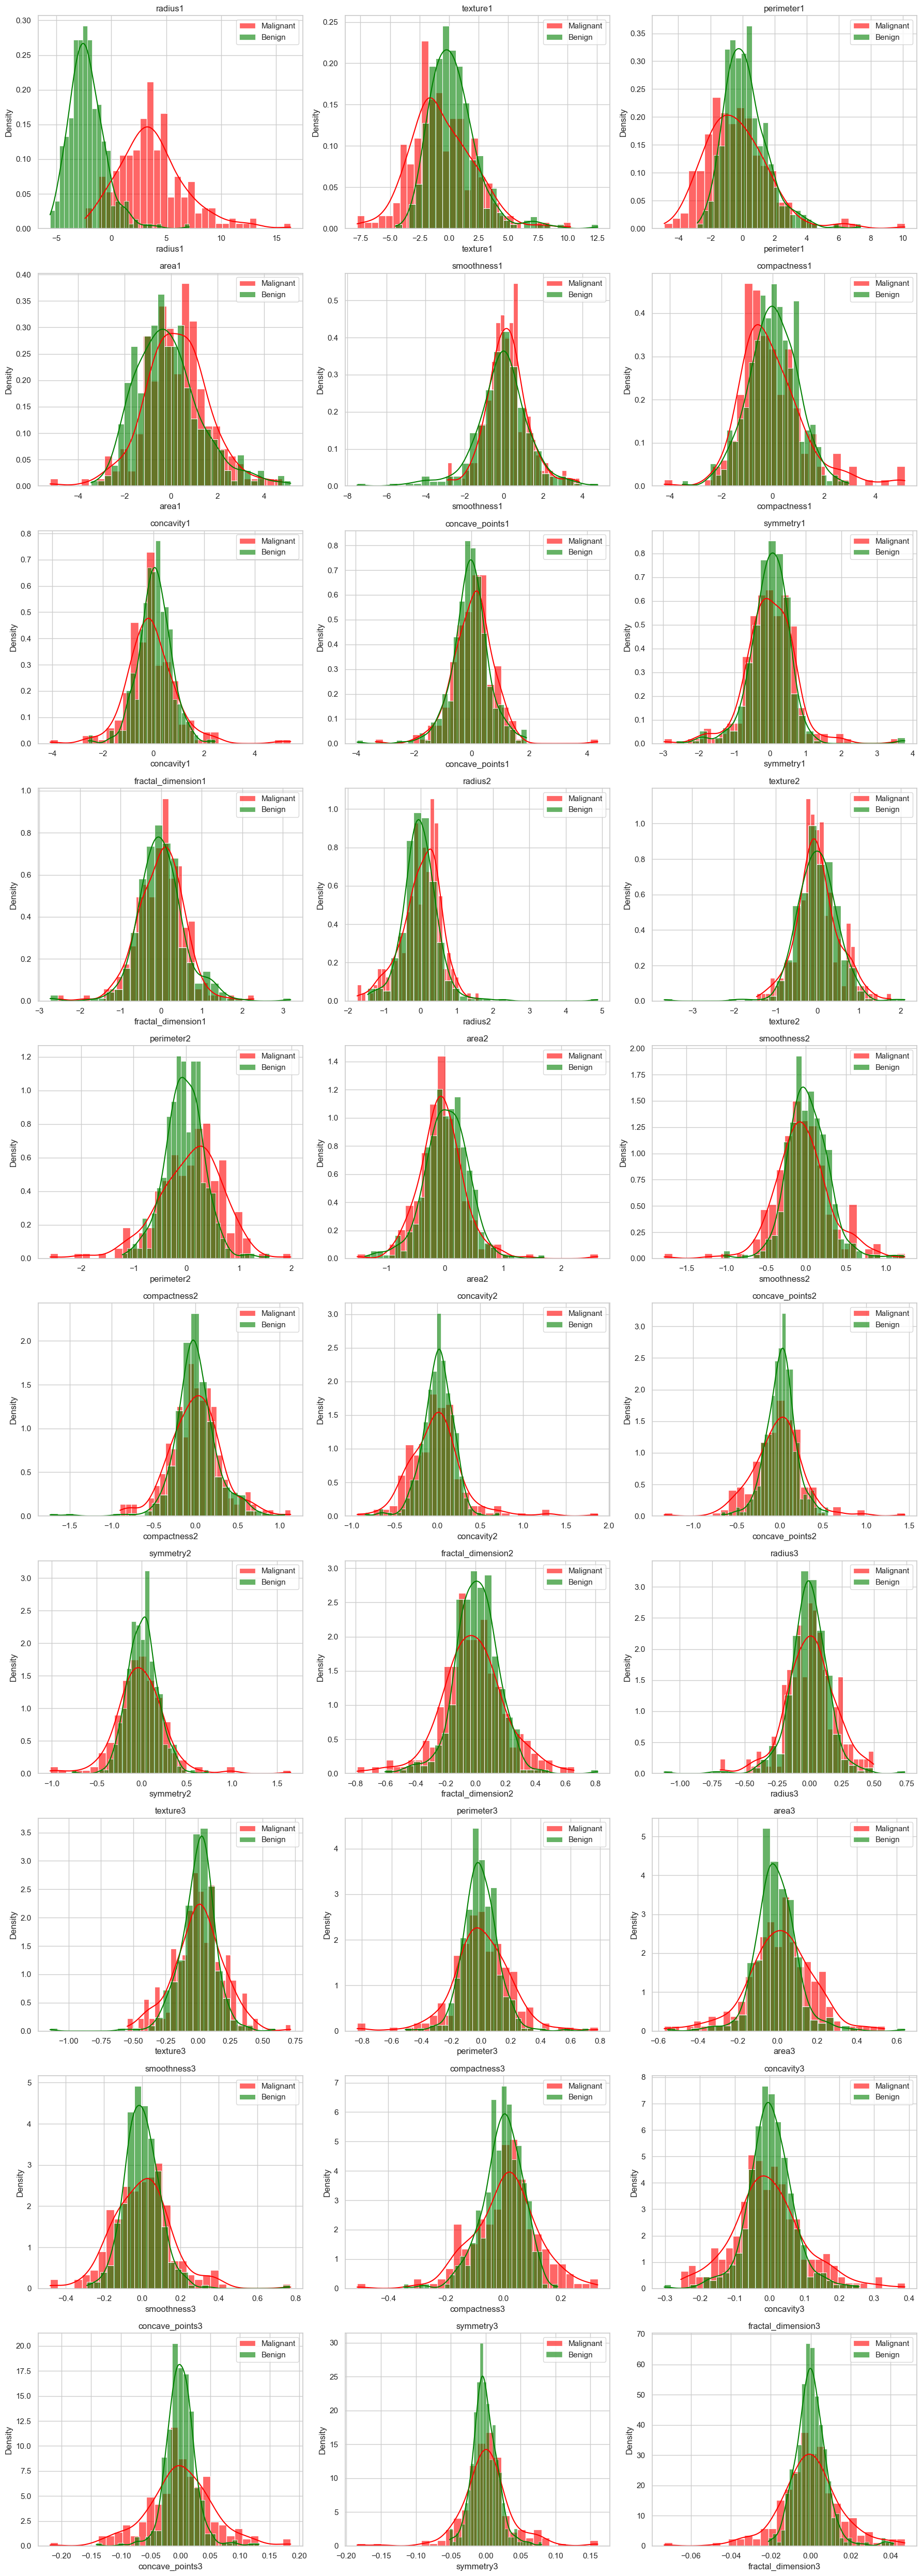

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a Seaborn style for better aesthetics
sns.set(style="whitegrid")

labels = cols[2:]
num_labels = len(labels)

# Define the number of columns for the subplot grid
num_cols = 3  # Adjust this number to change the number of columns in the grid
num_rows = (num_labels + num_cols - 1) // num_cols  # Calculate the required number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))
axes = axes.flatten()

for idx, label in enumerate(labels):
    ax = axes[idx]
    # Plot histograms for Malignant diagnoses
    sns.histplot(
        df[df["Diagnosis"] == 1][label],
        color="red",
        label="Malignant",
        alpha=0.6,
        kde=True,
        stat="density",
        bins=30,
        ax=ax
    )
    # Plot histograms for Benign diagnoses
    sns.histplot(
        df[df["Diagnosis"] == 0][label],
        color="green",
        label="Benign",
        alpha=0.6,
        kde=True,
        stat="density",
        bins=30,
        ax=ax
    )
    ax.set_title(label)
    ax.set_xlabel(label)
    ax.set_ylabel("Density")
    ax.legend()

# Remove any empty subplots if the number of labels isn't a multiple of num_cols
for idx in range(len(labels), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


Train, test

df.sample(frac=1) shuffle data

first part of its cut off for validation data 90%% 




In [11]:
from sklearn.model_selection import KFold

# Shuffle the DataFrame
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)  # Setting a random state for reproducibility

# Set up 10-fold cross-validation
kf = KFold(n_splits=10)

# Enumerate the folds
for fold, (train_index, test_index) in enumerate(kf.split(df_shuffled)):
    train = df_shuffled.iloc[train_index]
    test = df_shuffled.iloc[test_index]
    
    # Optional: Reset index if needed
    train.reset_index(drop=True, inplace=True)
    test.reset_index(drop=True, inplace=True)
    
    # Verify the sizes of the splits
    print(f"Fold {fold + 1}:")
    print(f"Training set size: {len(train)}")
    print(f"Testing set size: {len(test)}\n")
    


Fold 1:
Training set size: 512
Testing set size: 57

Fold 2:
Training set size: 512
Testing set size: 57

Fold 3:
Training set size: 512
Testing set size: 57

Fold 4:
Training set size: 512
Testing set size: 57

Fold 5:
Training set size: 512
Testing set size: 57

Fold 6:
Training set size: 512
Testing set size: 57

Fold 7:
Training set size: 512
Testing set size: 57

Fold 8:
Training set size: 512
Testing set size: 57

Fold 9:
Training set size: 512
Testing set size: 57

Fold 10:
Training set size: 513
Testing set size: 56



In [12]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[1:-1]].values
    y = dataframe[dataframe.columns[0]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    data = np.hstack((X, np.reshape(y,(-1, 1)))) #becasue x is 2d and y its only one dimension it must be reshape 2d shape -1

    return data, X, y

In [13]:
print(len(train[train["Diagnosis"]==0])) #B
print(len(train[train["Diagnosis"]==1])) #M


320
193


In [14]:
train, X_train, y_train = scale_dataset(train, oversample=True)
test, X_test, y_test = scale_dataset(test, oversample=False)



In [15]:
sum(y_train==0) #now y_train has the same size thanks to oversample


320

In [16]:
sum(y_train==1)


320

KNN

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from matplotlib.colors import ListedColormap

# Select two features for visualization (for example, features at index 0 and 1)
X_train_2d = X_train[:, :2]  # Adjust to the two desired features
X_test_2d = X_test[:, :2]

# Train the KNeighborsClassifier model on the selected 2 features
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train_2d, y_train)

# Make predictions
y_pred = knn_model.predict(X_test_2d)
print(classification_report(y_test, y_pred))

# Set the meshgrid for the decision boundary plot
h = .02  # step size in the mesh
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict class labels for each point in the meshgrid
Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Define the color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])  # Background colors for different regions
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])  # Foreground colors for points

# Plot the decision boundary by assigning a color to each point in the mesh
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

# Plot the training points with circle markers
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=50, label="Train Data")

# Plot the test points with "X" markers
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=100, marker='x', label="Test Data")

# Add labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Nearest Neighbors Decision Boundary')

# Add legend to differentiate between training and test data
plt.legend()

# Display the plot
plt.show()


              precision    recall  f1-score   support

           0       0.97      0.92      0.94        37
           1       0.86      0.95      0.90        19

    accuracy                           0.93        56
   macro avg       0.91      0.93      0.92        56
weighted avg       0.93      0.93      0.93        56



/var/folders/15/0t36wdtn559cnvf60kvrpzvh0000gn/T/ipykernel_27604/3220447885.py:41: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=100, marker='x', label="Test Data")


In [51]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Select only the first two features for visualization purposes
X_train_2d = X_train[:, :2]  # First two features
X_test_2d = X_test[:, :2]    # First two features

# Train a KNN model on the reduced feature set
knn_model_2d = KNeighborsClassifier(n_neighbors=10)
knn_model_2d.fit(X_train_2d, y_train)

# Create a mesh grid that covers a larger area, ensuring full background color coverage
x_min, x_max = X_train_2d[:, 0].min() - 2, X_train_2d[:, 0].max() + 2
y_min, y_max = X_train_2d[:, 1].min() - 2, X_train_2d[:, 1].max() + 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the label for each point in the mesh grid
Z = knn_model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Define a custom colormap: lighter red for one class, blue for the other
cmap_light = ListedColormap(['lightblue', 'lightcoral'])

# Plotting the decision boundaries with a lighter red and full background coverage
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_light)

# Plot the training points
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, marker='o', edgecolor='k', 
            cmap=ListedColormap(('blue', 'red')), s=50, label='Train Data')

# Plot the test points
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, marker='x', edgecolor='k', 
            cmap=ListedColormap(('blue', 'red')), s=100, label='Test Data')

# Adjusting the legend
plt.legend(loc='upper right')

# Add titles and labels
plt.title("K-Nearest Neighbors Decision Boundary with Full Background Coverage")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.show()


/var/folders/15/0t36wdtn559cnvf60kvrpzvh0000gn/T/ipykernel_27604/2690328790.py:35: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, marker='x', edgecolor='k',


#knn

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()


              precision    recall  f1-score   support

           0       0.84      1.00      0.91        37
           1       1.00      0.63      0.77        19

    accuracy                           0.88        56
   macro avg       0.92      0.82      0.84        56
weighted avg       0.89      0.88      0.87        56



Bayes

              precision    recall  f1-score   support

           0       0.92      0.89      0.90        37
           1       0.80      0.84      0.82        19

    accuracy                           0.88        56
   macro avg       0.86      0.87      0.86        56
weighted avg       0.88      0.88      0.88        56

AUC-ROC: 0.87


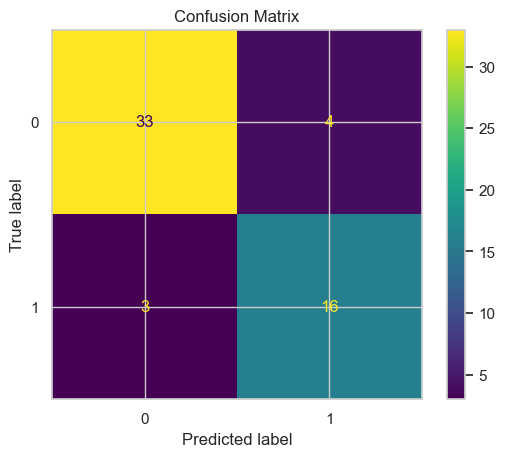

In [33]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

print(classification_report(y_test, y_pred))
auc = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC: {auc:.2f}")

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()




Log Regression

/Users/juliocortes/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.95      1.00      0.97        19

    accuracy                           0.98        56
   macro avg       0.97      0.99      0.98        56
weighted avg       0.98      0.98      0.98        56

AUC-ROC: 0.98


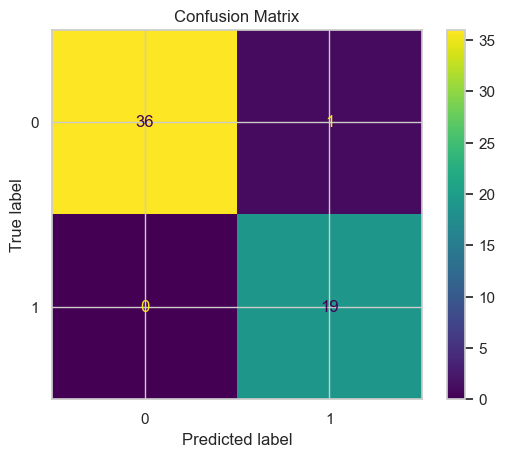

In [28]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression(penalty="l2",multi_class='auto')
lg_model = lg_model.fit(X_train, y_train)
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))
uc = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC: {auc:.2f}")

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()




In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# Assuming X_train and X_test have three features for 3D plotting
# Select the first three features for visualization
X_train_3d = X_train[:, :3]
X_test_3d = X_test[:, :3]

# Train the Logistic Regression model
lg_model = LogisticRegression(penalty="l2", multi_class='auto')
lg_model.fit(X_train_3d, y_train)

# Predict on the test set
y_pred = lg_model.predict(X_test_3d)

# Print classification report
print(classification_report(y_test, y_pred))

# Create a mesh grid for two of the features and calculate the third dimension's values
x_min, x_max = X_train_3d[:, 0].min() - 1, X_train_3d[:, 0].max() + 1
y_min, y_max = X_train_3d[:, 1].min() - 1, X_train_3d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                     np.linspace(y_min, y_max, 50))

# Create a dummy third feature (e.g., the mean value of the third feature in the training set)
zz = np.full(xx.shape, X_train_3d[:, 2].mean())

# Predict on the grid points (xx, yy, zz)
Z = lg_model.predict(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])
Z = Z.reshape(xx.shape)

# 3D Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the decision surface
ax.plot_surface(xx, yy, zz, facecolors=ListedColormap(('lightblue', 'lightcoral'))(Z), alpha=0.3, rstride=1, cstride=1, linewidth=0)

# Plot also the training points in 3D
ax.scatter(X_train_3d[:, 0], X_train_3d[:, 1], X_train_3d[:, 2], c=y_train, cmap=ListedColormap(('blue', 'red')), edgecolor='k')

# Set axis labels
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.title('Logistic Regression Decision Boundary (3D)')

plt.show()



/Users/juliocortes/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      0.89      0.94        37
           1       0.83      1.00      0.90        19

    accuracy                           0.93        56
   macro avg       0.91      0.95      0.92        56
weighted avg       0.94      0.93      0.93        56



In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from matplotlib.colors import ListedColormap

# Assuming X_train and X_test have two features for 2D plotting
# Select the first two features for visualization
X_train_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]

# Train the Logistic Regression model
lg_model = LogisticRegression(penalty="l2", multi_class='auto')
lg_model.fit(X_train_2d, y_train)

# Predict on the test set
y_pred = lg_model.predict(X_test_2d)
y_pred_proba = lg_model.predict_proba(X_test_2d)[:, 1]  # Get probability scores for ROC curve

# Print classification report
print(classification_report(y_test, y_pred))

# Calculate and print AUC-ROC
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC: {auc:.2f}")

# Create a mesh grid for plotting decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot decision boundary by predicting on mesh grid
Z = lg_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting decision boundary and the training points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=ListedColormap(('lightblue', 'lightcoral')), alpha=0.8)

# Plot also the training points
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolors='k', cmap=ListedColormap(('blue', 'red')))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


              precision    recall  f1-score   support

           0       1.00      0.89      0.94        37
           1       0.83      1.00      0.90        19

    accuracy                           0.93        56
   macro avg       0.91      0.95      0.92        56
weighted avg       0.94      0.93      0.93        56

AUC-ROC: 0.98


/Users/juliocortes/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


ValueError: X has 2 features, but LogisticRegression is expecting 3 features as input.

SVC Model

In [20]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
svm_model = SVC(kernel='rbf', gamma='auto', C=1.0) # Create the SVM model with a non-linear kernel (RBF)
print(classification_report(y_test, y_pred))
uc = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC: {auc:.2f}")

              precision    recall  f1-score   support

           0       0.94      0.89      0.92        37
           1       0.81      0.89      0.85        19

    accuracy                           0.89        56
   macro avg       0.88      0.89      0.88        56
weighted avg       0.90      0.89      0.89        56

AUC-ROC: 0.82


Neural networks

              precision    recall  f1-score   support

           0       0.94      0.89      0.92        37
           1       0.81      0.89      0.85        19

    accuracy                           0.89        56
   macro avg       0.88      0.89      0.88        56
weighted avg       0.90      0.89      0.89        56

AUC-ROC: 0.99


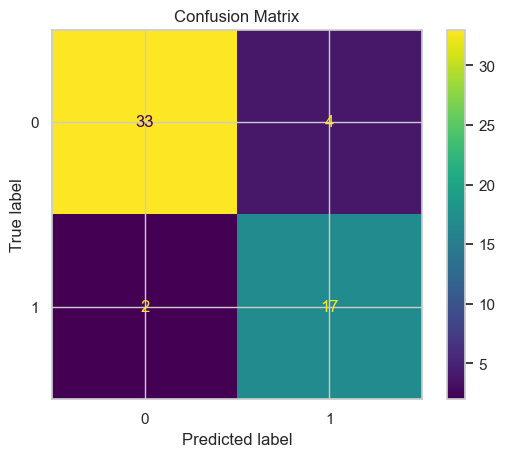

In [21]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay

# Train the SVM model
svm_model = SVC(kernel='rbf', gamma='auto', C=1.0, probability=True)  # Set probability=True to plot ROC
svm_model = svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)
y_pred_proba = svm_model.predict_proba(X_test)[:, 1]  # Get probability scores for ROC curve

# Print classification report
print(classification_report(y_test, y_pred))

# Calculate and print AUC-ROC
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC: {auc:.2f}")

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from matplotlib.colors import ListedColormap

# Assuming X_train and X_test have two features for 2D plotting
# Select the first two features for visualization
X_train_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]

# Train the SVM model on the first two features
svm_model = SVC(kernel='rbf', gamma='auto', C=1.0)
svm_model.fit(X_train_2d, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test_2d)

# Print classification report
print(classification_report(y_test, y_pred))

# Create a mesh grid for plotting decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot decision boundary by predicting on mesh grid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=ListedColormap(('lightblue', 'lightcoral')), alpha=0.8)

# Plot also the training points
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolors='k', cmap=ListedColormap(('blue', 'red')))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary with RBF Kernel')
plt.show()


              precision    recall  f1-score   support

           0       1.00      0.92      0.96        37
           1       0.86      1.00      0.93        19

    accuracy                           0.95        56
   macro avg       0.93      0.96      0.94        56
weighted avg       0.95      0.95      0.95        56



              precision    recall  f1-score   support

           0       1.00      0.92      0.96        37
           1       0.86      1.00      0.93        19

    accuracy                           0.95        56
   macro avg       0.93      0.96      0.94        56
weighted avg       0.95      0.95      0.95        56



/var/folders/15/0t36wdtn559cnvf60kvrpzvh0000gn/T/ipykernel_27604/1824150579.py:40: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, edgecolors='k', cmap=ListedColormap(('blue', 'red')), s=100, marker='x', label="Test Data")


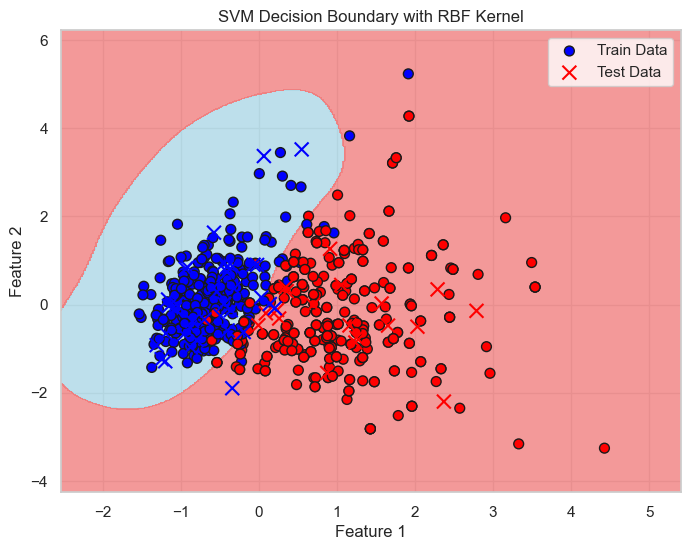

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from matplotlib.colors import ListedColormap

# Assuming X_train and X_test have two features for 2D plotting
# Select the first two features for visualization
X_train_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]

# Train the SVM model on the first two features
svm_model = SVC(kernel='rbf', gamma='auto', C=1.0)
svm_model.fit(X_train_2d, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test_2d)

# Print classification report
print(classification_report(y_test, y_pred))

# Create a mesh grid for plotting decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot decision boundary by predicting on mesh grid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=ListedColormap(('lightblue', 'lightcoral')), alpha=0.8)

# Plot the training points
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolors='k', cmap=ListedColormap(('blue', 'red')), s=50, label="Train Data")

# Plot the test points using "X" markers
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, edgecolors='k', cmap=ListedColormap(('blue', 'red')), s=100, marker='x', label="Test Data")

# Add labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary with RBF Kernel')

# Show legend
plt.legend()

# Display the plot
plt.show()


In [712]:
import tensorflow as tf

In [713]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'],label= 'loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch' )
  ax1.set_ylabel('Binary_crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'],label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax1.grid(True)

  plt.show()



In [715]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    input_dim = X_train.shape[1]  # Dynamically get the number of features
    
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(input_dim,),
                              kernel_regularizer=regularizers.l2(0.001)),
        BatchNormalization(),
        tf.keras.layers.Dropout(dropout_prob),
        
        tf.keras.layers.Dense(num_nodes, activation='relu',
                              kernel_regularizer=regularizers.l2(0.001)),
        BatchNormalization(),
        tf.keras.layers.Dropout(dropout_prob),
        
        tf.keras.layers.Dense(num_nodes, activation='relu',
                              kernel_regularizer=regularizers.l2(0.001)),
        BatchNormalization(),
        tf.keras.layers.Dropout(dropout_prob),
        
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    nn_model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    # Define callbacks for early stopping and learning rate reduction
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )
    lr_reduction = ReduceLROnPlateau(
        monitor='val_loss',
        patience=5,
        factor=0.5,
        min_lr=1e-6
    )
    
    history = nn_model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.2,
        callbacks=[early_stopping, lr_reduction],
        verbose=1
    )
    return nn_model, history


16 nodes, dropout 0, lr 0.01, batch size 32
Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6098 - loss: 0.8771 - val_accuracy: 0.5631 - val_loss: 0.7013 - learning_rate: 0.0100
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8942 - loss: 0.3949 - val_accuracy: 0.6214 - val_loss: 0.6153 - learning_rate: 0.0100
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9193 - loss: 0.3022 - val_accuracy: 0.8252 - val_loss: 0.4635 - learning_rate: 0.0100
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9669 - loss: 0.1724 - val_accuracy: 0.8932 - val_loss: 0.3632 - learning_rate: 0.0100
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9774 - loss: 0.1208 - val_accuracy: 0.9126 - val_loss: 0.2939 - learning_rate: 0.0100
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9828 - loss: 0.1114 - val_accuracy: 0.9223 - val_loss: 0.2617 - learning_rate: 0.0100
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8988 - loss: 0.2444
16 nodes, dropout 0, lr 0.01, batch size 64
Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6321 - loss: 0.7131 - val_accuracy: 0.7670 - val_loss: 0.6529 - learning_rate: 0.0100
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8309 - loss: 0.4877 - val_accuracy: 0.7961 - val_loss: 0.5545 - learning_rate: 0.0100
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9159 - loss: 0.3230 - val_accuracy: 0.8447 - val_loss: 0.4618 - learning_rate: 0.0100
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9356 - loss: 0.2278 - val_accuracy: 0.8641 - val_loss: 0.3746 - learning_rate: 0.0100
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9601 - loss: 0.1745 - val_accuracy: 0.9223 - val_loss: 0.2863 - learning_rate: 0.0100
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9802 - loss: 0.1418 - val_accuracy: 0.9320 - val_loss: 0.2423 - learning_rat

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9435 - loss: 0.2302  
16 nodes, dropout 0, lr 0.01, batch size 128
Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.4545 - loss: 0.9833 - val_accuracy: 0.5922 - val_loss: 0.7390 - learning_rate: 0.0100
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7417 - loss: 0.5816 - val_accuracy: 0.5728 - val_loss: 0.7221 - learning_rate: 0.0100
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8359 - loss: 0.4795 - val_accuracy: 0.5728 - val_loss: 0.6987 - learning_rate: 0.0100
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8330 - loss: 0.4216 - val_accuracy: 0.6311 - val_loss: 0.6653 - learning_rate: 0.0100
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8968 - loss: 0.3472 - val_accuracy: 0.6796 - val_loss: 0.6233 - learning_rate: 0.0100
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9276 - loss: 0.2847 - val_accuracy: 0.7573 - val_loss: 0.5747 - learning_

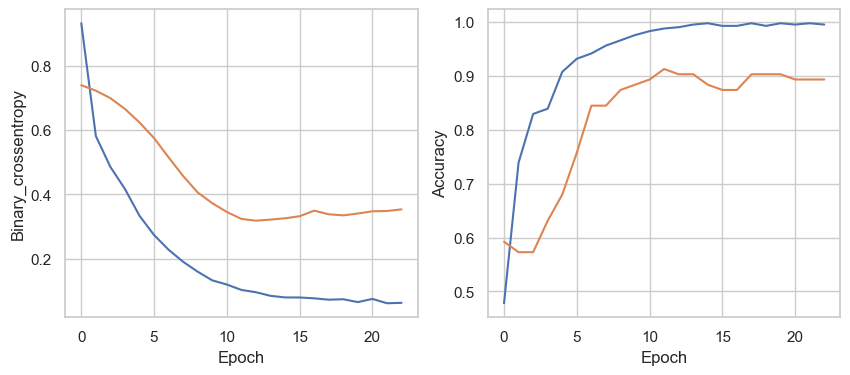

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9301 - loss: 0.3052
16 nodes, dropout 0, lr 0.005, batch size 32
Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4549 - loss: 0.9328 - val_accuracy: 0.5922 - val_loss: 0.7330 - learning_rate: 0.0050
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7674 - loss: 0.5746 - val_accuracy: 0.6311 - val_loss: 0.6706 - learning_rate: 0.0050
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8677 - loss: 0.3896 - val_accuracy: 0.7087 - val_loss: 0.6023 - learning_rate: 0.0050
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9252 - loss: 0.2810 - val_accuracy: 0.8155 - val_loss: 0.5062 - learning_rate: 0.0050
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9562 - loss: 0.2183 - val_accuracy: 0.8932 - val_loss: 0.4110 - learning_rate: 0.0050
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9720 - loss: 0.1684 - val_accuracy: 0.8932 - val_loss: 0.3557 -

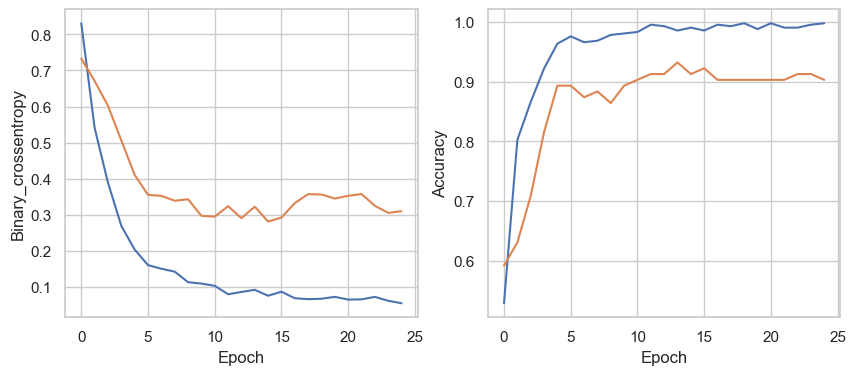

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9077 - loss: 0.2929  
16 nodes, dropout 0, lr 0.005, batch size 64
Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5730 - loss: 0.7822 - val_accuracy: 0.6699 - val_loss: 0.6740 - learning_rate: 0.0050
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7617 - loss: 0.5747 - val_accuracy: 0.7767 - val_loss: 0.6295 - learning_rate: 0.0050
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8540 - loss: 0.4627 - val_accuracy: 0.8155 - val_loss: 0.5796 - learning_rate: 0.0050
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8806 - loss: 0.3881 - val_accuracy: 0.8641 - val_loss: 0.5249 - learning_rate: 0.0050
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9146 - loss: 0.3038 - val_accuracy: 0.8641 - val_loss: 0.4642 - learning_rate: 0.0050
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9645 - loss: 0.2203 - val_accuracy: 0.8835 - val_loss: 0.4076 - learning_

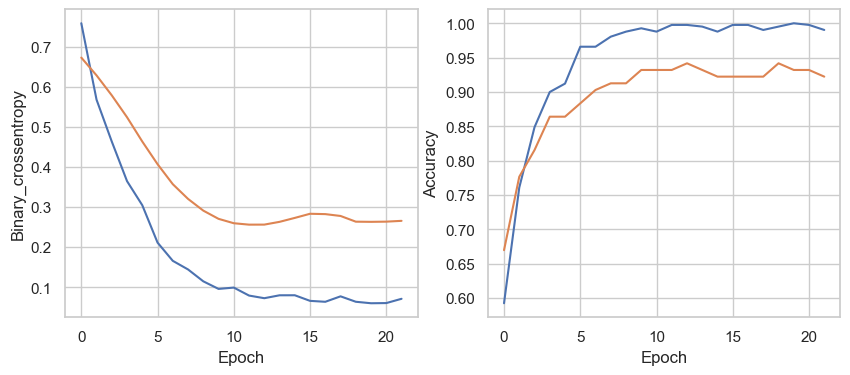

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9077 - loss: 0.2849  
16 nodes, dropout 0, lr 0.005, batch size 128
Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.5730 - loss: 0.8315 - val_accuracy: 0.5243 - val_loss: 0.7175 - learning_rate: 0.0050
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6947 - loss: 0.6409 - val_accuracy: 0.6214 - val_loss: 0.6807 - learning_rate: 0.0050
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7631 - loss: 0.5686 - val_accuracy: 0.7670 - val_loss: 0.6546 - learning_rate: 0.0050
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8280 - loss: 0.5017 - val_accuracy: 0.7864 - val_loss: 0.6339 - learning_rate: 0.0050
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8462 - loss: 0.4732 - val_accuracy: 0.8058 - val_loss: 0.6145 - learning_rate: 0.0050
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8729 - loss: 0.4264 - val_accuracy: 0.7961 - val_loss: 0.5921 - learning

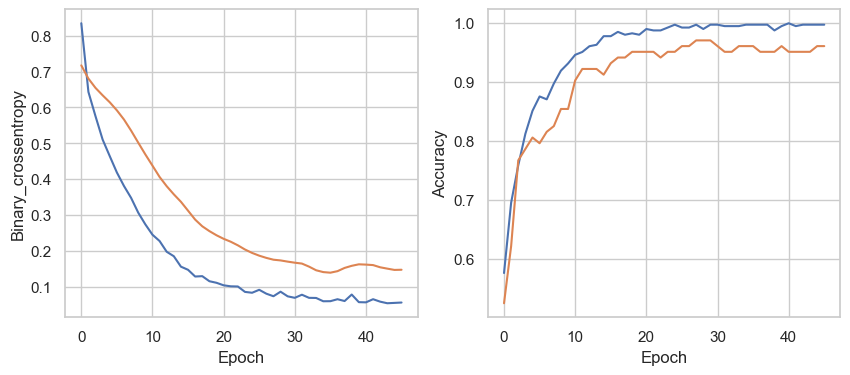

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9658 - loss: 0.1625  
16 nodes, dropout 0, lr 0.001, batch size 32
Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5194 - loss: 1.0022 - val_accuracy: 0.3883 - val_loss: 0.7821 - learning_rate: 0.0010
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5264 - loss: 0.8915 - val_accuracy: 0.4369 - val_loss: 0.7578 - learning_rate: 0.0010
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5452 - loss: 0.8425 - val_accuracy: 0.5728 - val_loss: 0.7362 - learning_rate: 0.0010
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5852 - loss: 0.7349 - val_accuracy: 0.6214 - val_loss: 0.7182 - learning_rate: 0.0010
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6486 - loss: 0.6923 - val_accuracy: 0.6699 - val_loss: 0.7006 - learning_rate: 0.0010
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6636 - loss: 0.6710 - val_accuracy: 0.6505 - val_loss: 0.6855

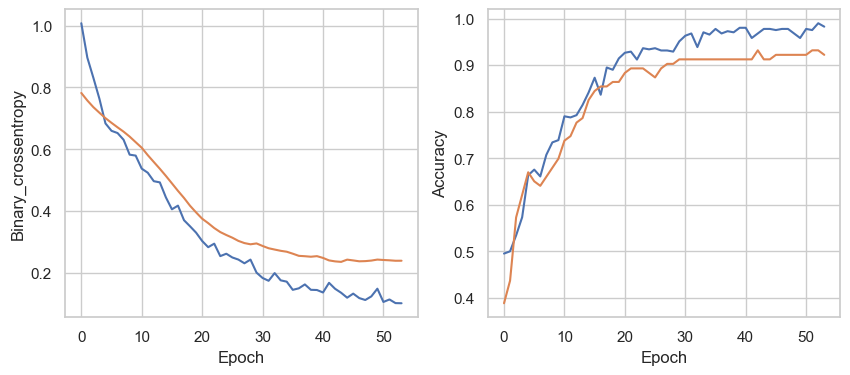

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8973 - loss: 0.2479 
16 nodes, dropout 0, lr 0.001, batch size 64
Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5007 - loss: 0.8610 - val_accuracy: 0.4757 - val_loss: 0.8146 - learning_rate: 0.0010
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5623 - loss: 0.7767 - val_accuracy: 0.5049 - val_loss: 0.7887 - learning_rate: 0.0010
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6087 - loss: 0.7380 - val_accuracy: 0.5534 - val_loss: 0.7643 - learning_rate: 0.0010
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6880 - loss: 0.6787 - val_accuracy: 0.5922 - val_loss: 0.7411 - learning_rate: 0.0010
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7223 - loss: 0.6275 - val_accuracy: 0.6602 - val_loss: 0.7201 - learning_rate: 0.0010
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7567 - loss: 0.6119 - val_accuracy: 0.7184 - val_loss: 0.7008 - learning_r

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8750 - loss: 0.4655
16 nodes, dropout 0, lr 0.001, batch size 128
Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.5916 - loss: 0.7508 - val_accuracy: 0.4272 - val_loss: 0.7495 - learning_rate: 0.0010
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6740 - loss: 0.7145 - val_accuracy: 0.4175 - val_loss: 0.7431 - learning_rate: 0.0010
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6934 - loss: 0.6939 - val_accuracy: 0.4757 - val_loss: 0.7369 - learning_rate: 0.0010
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6594 - loss: 0.6758 - val_accuracy: 0.5340 - val_loss: 0.7305 - learning_rate: 0.0010
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7164 - loss: 0.6347 - val_accuracy: 0.5922 - val_loss: 0.7240 - learning_rate: 0.0010
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7276 - loss: 0.6167 - val_accuracy: 0.6408 - val_loss: 0.7173 - learning_r

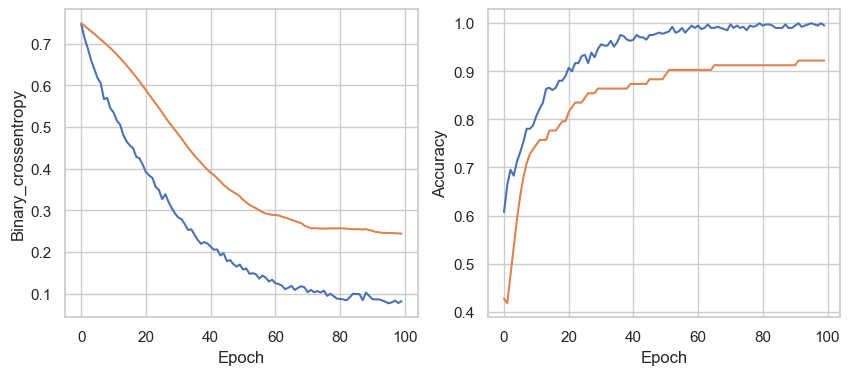

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8869 - loss: 0.3213
16 nodes, dropout 0.2, lr 0.01, batch size 32
Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6204 - loss: 0.8272 - val_accuracy: 0.6699 - val_loss: 0.6567 - learning_rate: 0.0100
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8038 - loss: 0.5102 - val_accuracy: 0.8447 - val_loss: 0.5547 - learning_rate: 0.0100
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8408 - loss: 0.4021 - val_accuracy: 0.8932 - val_loss: 0.4155 - learning_rate: 0.0100
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9048 - loss: 0.2991 - val_accuracy: 0.9320 - val_loss: 0.2929 - learning_rate: 0.0100
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9301 - loss: 0.2615 - val_accuracy: 0.9515 - val_loss: 0.2179 - learning_rate: 0.0100
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9434 - loss: 0.1972 - val_accuracy: 0.9612 - val_loss: 0.1956 

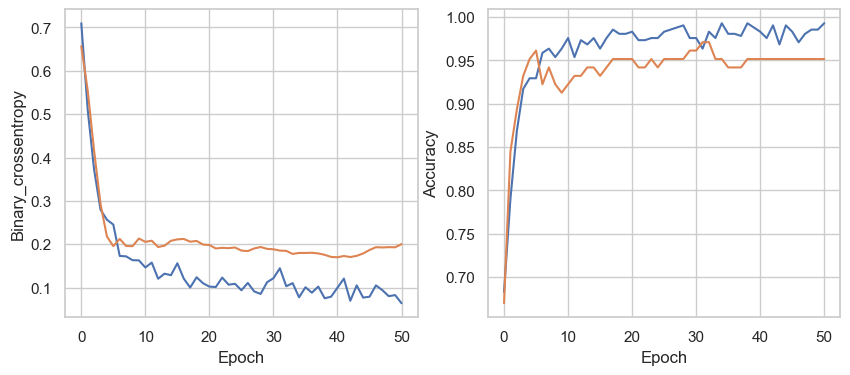

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9539 - loss: 0.1570
16 nodes, dropout 0.2, lr 0.01, batch size 64
Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5912 - loss: 0.7827 - val_accuracy: 0.6893 - val_loss: 0.6504 - learning_rate: 0.0100
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7251 - loss: 0.5852 - val_accuracy: 0.7961 - val_loss: 0.5717 - learning_rate: 0.0100
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7985 - loss: 0.4876 - val_accuracy: 0.8155 - val_loss: 0.5044 - learning_rate: 0.0100
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8675 - loss: 0.3861 - val_accuracy: 0.8252 - val_loss: 0.4640 - learning_rate: 0.0100
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8944 - loss: 0.3062 - val_accuracy: 0.7864 - val_loss: 0.4633 - learning_rate: 0.0100
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9148 - loss: 0.2721 - val_accuracy: 0.7476 - val_loss: 0.4992 - learning_r

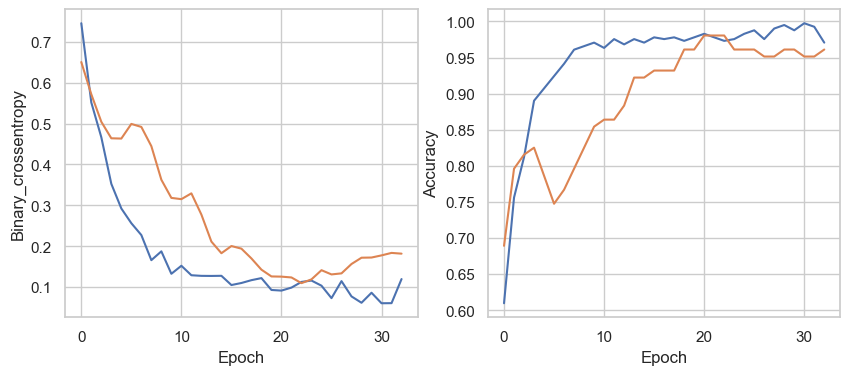

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9420 - loss: 0.2085
16 nodes, dropout 0.2, lr 0.01, batch size 128
Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.6210 - loss: 0.7969 - val_accuracy: 0.6990 - val_loss: 0.6831 - learning_rate: 0.0100
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7319 - loss: 0.5996 - val_accuracy: 0.7573 - val_loss: 0.6358 - learning_rate: 0.0100
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8032 - loss: 0.5239 - val_accuracy: 0.8155 - val_loss: 0.5912 - learning_rate: 0.0100
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8261 - loss: 0.4669 - val_accuracy: 0.8641 - val_loss: 0.5447 - learning_rate: 0.0100
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8435 - loss: 0.4105 - val_accuracy: 0.8738 - val_loss: 0.5007 - learning_rate: 0.0100
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8737 - loss: 0.3794 - val_accuracy: 0.8738 - val_loss: 0.4719 - learning_

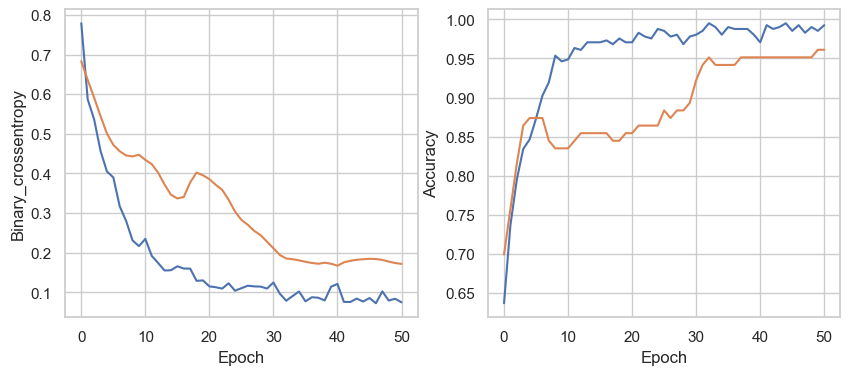

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9077 - loss: 0.2051  
16 nodes, dropout 0.2, lr 0.005, batch size 32
Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6004 - loss: 0.8238 - val_accuracy: 0.6699 - val_loss: 0.6561 - learning_rate: 0.0050
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7490 - loss: 0.6318 - val_accuracy: 0.7670 - val_loss: 0.6056 - learning_rate: 0.0050
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8177 - loss: 0.4971 - val_accuracy: 0.7767 - val_loss: 0.5744 - learning_rate: 0.0050
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8009 - loss: 0.5006 - val_accuracy: 0.7961 - val_loss: 0.5395 - learning_rate: 0.0050
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8650 - loss: 0.4151 - val_accuracy: 0.8058 - val_loss: 0.5005 - learning_rate: 0.0050
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8958 - loss: 0.3598 - val_accuracy: 0.8155 - val_loss: 0.44

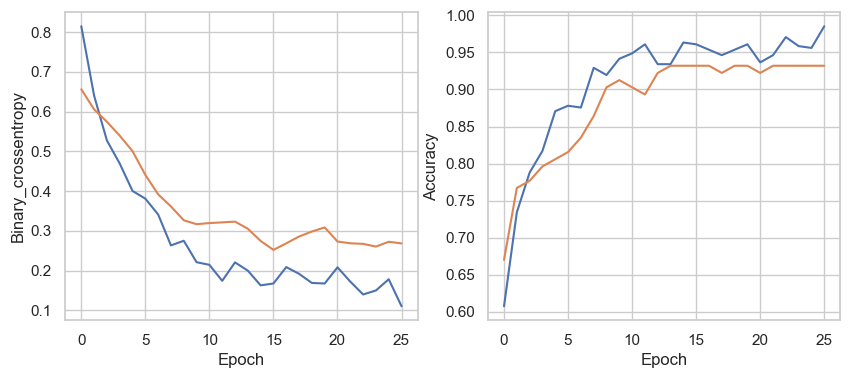

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9643 - loss: 0.1704  
16 nodes, dropout 0.2, lr 0.005, batch size 64
Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.4981 - loss: 0.9092 - val_accuracy: 0.5534 - val_loss: 0.7317 - learning_rate: 0.0050
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5392 - loss: 0.7536 - val_accuracy: 0.5825 - val_loss: 0.7111 - learning_rate: 0.0050
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6290 - loss: 0.6793 - val_accuracy: 0.5631 - val_loss: 0.6978 - learning_rate: 0.0050
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7052 - loss: 0.6698 - val_accuracy: 0.5825 - val_loss: 0.6855 - learning_rate: 0.0050
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7119 - loss: 0.6505 - val_accuracy: 0.6117 - val_loss: 0.6716 - learning_rate: 0.0050
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7222 - loss: 0.5910 - val_accuracy: 0.6214 - val_loss: 0.6538 - learnin

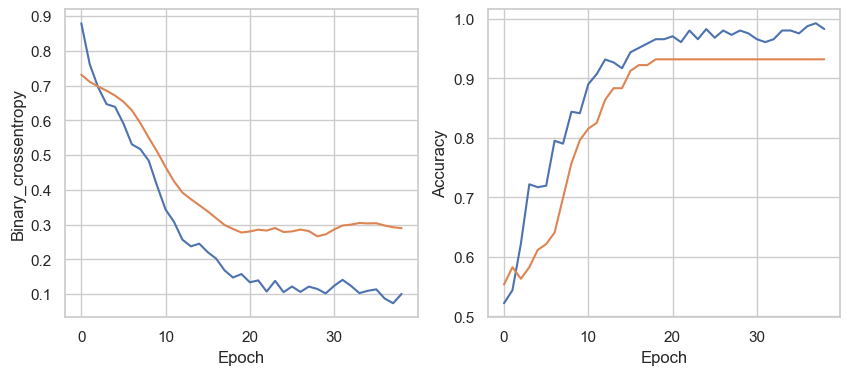

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9315 - loss: 0.2114  
16 nodes, dropout 0.2, lr 0.005, batch size 128
Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.5969 - loss: 0.8311 - val_accuracy: 0.5049 - val_loss: 0.7251 - learning_rate: 0.0050
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6587 - loss: 0.7464 - val_accuracy: 0.6408 - val_loss: 0.6996 - learning_rate: 0.0050
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6966 - loss: 0.6667 - val_accuracy: 0.7282 - val_loss: 0.6725 - learning_rate: 0.0050
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7406 - loss: 0.5965 - val_accuracy: 0.7961 - val_loss: 0.6481 - learning_rate: 0.0050
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7789 - loss: 0.5359 - val_accuracy: 0.7961 - val_loss: 0.6246 - learning_rate: 0.0050
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7608 - loss: 0.5628 - val_accuracy: 0.7961 - val_loss: 0.5999 - learni

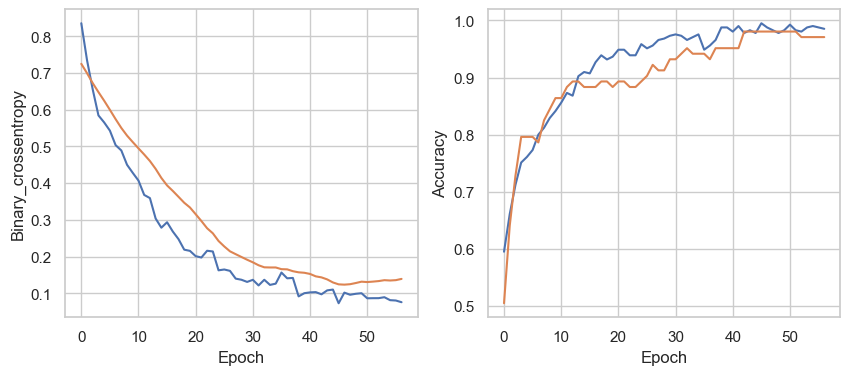

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9062 - loss: 0.1604
16 nodes, dropout 0.2, lr 0.001, batch size 32
Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6008 - loss: 0.8690 - val_accuracy: 0.6019 - val_loss: 0.7126 - learning_rate: 0.0010
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5873 - loss: 0.8035 - val_accuracy: 0.6505 - val_loss: 0.6886 - learning_rate: 0.0010
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6376 - loss: 0.7091 - val_accuracy: 0.6796 - val_loss: 0.6696 - learning_rate: 0.0010
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6707 - loss: 0.6836 - val_accuracy: 0.7379 - val_loss: 0.6498 - learning_rate: 0.0010
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6871 - loss: 0.6693 - val_accuracy: 0.7573 - val_loss: 0.6311 - learning_rate: 0.0010
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6838 - loss: 0.7087 - val_accuracy: 0.7767 - val_loss: 0.6118

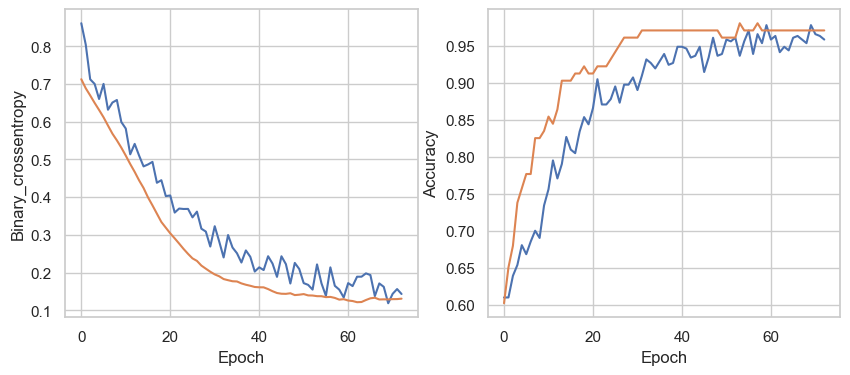

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9420 - loss: 0.1880
16 nodes, dropout 0.2, lr 0.001, batch size 64
Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5818 - loss: 0.8751 - val_accuracy: 0.5534 - val_loss: 0.7194 - learning_rate: 0.0010
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5754 - loss: 0.8840 - val_accuracy: 0.6019 - val_loss: 0.7043 - learning_rate: 0.0010
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6080 - loss: 0.8372 - val_accuracy: 0.6602 - val_loss: 0.6893 - learning_rate: 0.0010
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5666 - loss: 0.8658 - val_accuracy: 0.6990 - val_loss: 0.6725 - learning_rate: 0.0010
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6835 - loss: 0.7744 - val_accuracy: 0.7184 - val_loss: 0.6575 - learning_rate: 0.0010
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6960 - loss: 0.6910 - val_accuracy: 0.6990 - val_loss: 0.6408 - learning_

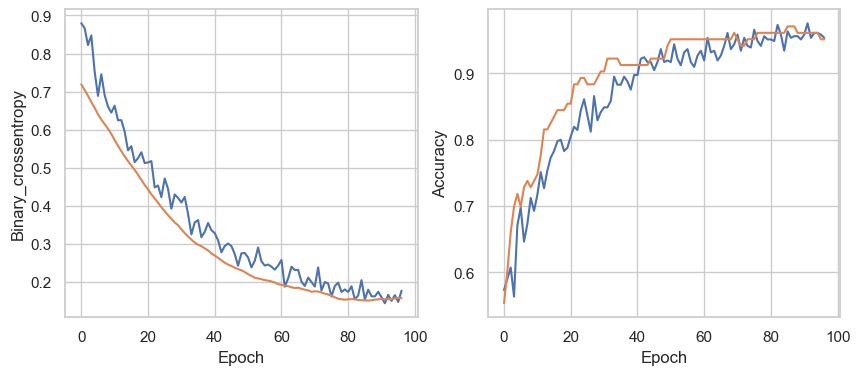

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9658 - loss: 0.1278  
16 nodes, dropout 0.2, lr 0.001, batch size 128
Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.4206 - loss: 1.1328 - val_accuracy: 0.5728 - val_loss: 0.7507 - learning_rate: 0.0010
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4216 - loss: 1.1036 - val_accuracy: 0.5728 - val_loss: 0.7426 - learning_rate: 0.0010
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4310 - loss: 1.0721 - val_accuracy: 0.6019 - val_loss: 0.7352 - learning_rate: 0.0010
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4684 - loss: 0.9785 - val_accuracy: 0.6311 - val_loss: 0.7295 - learning_rate: 0.0010
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4740 - loss: 0.9214 - val_accuracy: 0.6214 - val_loss: 0.7239 - learning_rate: 0.0010
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4931 - loss: 0.9674 - val_accuracy: 0.6214 - val_loss: 0.7188 - learni

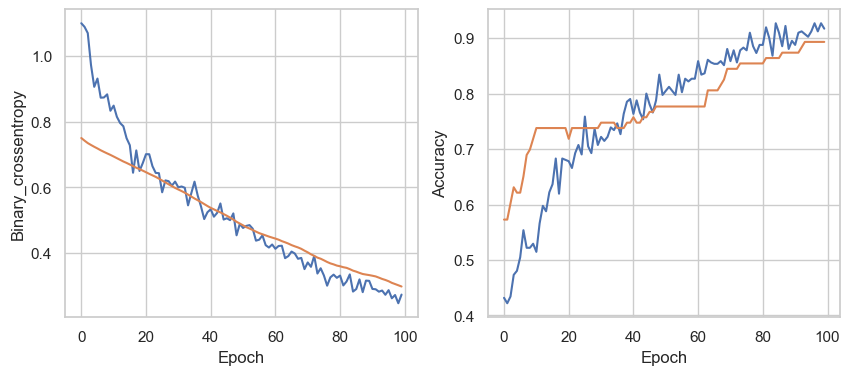

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9301 - loss: 0.2472  
32 nodes, dropout 0, lr 0.01, batch size 32
Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7208 - loss: 0.6417 - val_accuracy: 0.8641 - val_loss: 0.5568 - learning_rate: 0.0100
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9662 - loss: 0.2592 - val_accuracy: 0.9029 - val_loss: 0.3561 - learning_rate: 0.0100
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9725 - loss: 0.1964 - val_accuracy: 0.9320 - val_loss: 0.2707 - learning_rate: 0.0100
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9883 - loss: 0.1300 - val_accuracy: 0.9320 - val_loss: 0.2341 - learning_rate: 0.0100
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9987 - loss: 0.1124 - val_accuracy: 0.9417 - val_loss: 0.2194 - learning_rate: 0.0100
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9956 - loss: 0.1056 - val_accuracy: 0.9515 - val_loss: 0.2031 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9315 - loss: 0.2149
32 nodes, dropout 0, lr 0.01, batch size 64
Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.5494 - loss: 0.9076 - val_accuracy: 0.7379 - val_loss: 0.6703 - learning_rate: 0.0100
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8802 - loss: 0.4068 - val_accuracy: 0.8544 - val_loss: 0.5365 - learning_rate: 0.0100
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9497 - loss: 0.2541 - val_accuracy: 0.9223 - val_loss: 0.4100 - learning_rate: 0.0100
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9847 - loss: 0.1870 - val_accuracy: 0.9320 - val_loss: 0.3285 - learning_rate: 0.0100
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9816 - loss: 0.1520 - val_accuracy: 0.9320 - val_loss: 0.2891 - learning_rate: 0.0100
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9950 - loss: 0.1308 - val_accuracy: 0.9417 - val_loss: 0.2516 - learning_rat

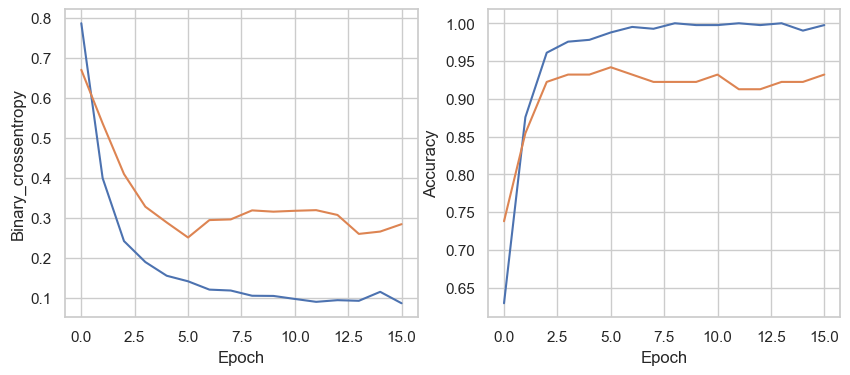

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8973 - loss: 0.3180
32 nodes, dropout 0, lr 0.01, batch size 128
Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.6162 - loss: 0.7611 - val_accuracy: 0.7184 - val_loss: 0.6915 - learning_rate: 0.0100
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8892 - loss: 0.4476 - val_accuracy: 0.8058 - val_loss: 0.6125 - learning_rate: 0.0100
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9315 - loss: 0.3156 - val_accuracy: 0.8932 - val_loss: 0.5214 - learning_rate: 0.0100
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9602 - loss: 0.2303 - val_accuracy: 0.9029 - val_loss: 0.4509 - learning_rate: 0.0100
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9600 - loss: 0.2203 - val_accuracy: 0.9029 - val_loss: 0.4102 - learning_rate: 0.0100
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9870 - loss: 0.1626 - val_accuracy: 0.8835 - val_loss: 0.3975 - learning_ra

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8616 - loss: 0.3367   
32 nodes, dropout 0, lr 0.005, batch size 32
Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6682 - loss: 0.7441 - val_accuracy: 0.8058 - val_loss: 0.6934 - learning_rate: 0.0050
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8813 - loss: 0.3851 - val_accuracy: 0.9126 - val_loss: 0.5314 - learning_rate: 0.0050
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9504 - loss: 0.2623 - val_accuracy: 0.9223 - val_loss: 0.4114 - learning_rate: 0.0050
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9632 - loss: 0.2207 - val_accuracy: 0.9515 - val_loss: 0.3392 - learning_rate: 0.0050
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9758 - loss: 0.1754 - val_accuracy: 0.9417 - val_loss: 0.3077 - learning_rate: 0.0050
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9942 - loss: 0.1348 - val_accuracy: 0.9417 - val_loss: 0.285

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9643 - loss: 0.1960  
32 nodes, dropout 0, lr 0.005, batch size 64
Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6351 - loss: 0.8048 - val_accuracy: 0.7379 - val_loss: 0.6879 - learning_rate: 0.0050
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8528 - loss: 0.4875 - val_accuracy: 0.8544 - val_loss: 0.6339 - learning_rate: 0.0050
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9072 - loss: 0.3762 - val_accuracy: 0.9029 - val_loss: 0.5787 - learning_rate: 0.0050
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9508 - loss: 0.2879 - val_accuracy: 0.9126 - val_loss: 0.5214 - learning_rate: 0.0050
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9688 - loss: 0.2342 - val_accuracy: 0.9126 - val_loss: 0.4650 - learning_rate: 0.0050
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9836 - loss: 0.1799 - val_accuracy: 0.9126 - val_loss: 0.4063 - learning_

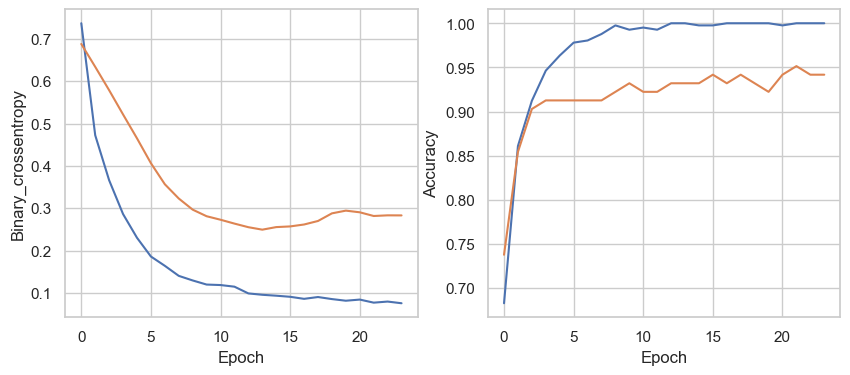

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9539 - loss: 0.2105  
32 nodes, dropout 0, lr 0.005, batch size 128
Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.5121 - loss: 0.9572 - val_accuracy: 0.5825 - val_loss: 0.7394 - learning_rate: 0.0050
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8340 - loss: 0.5381 - val_accuracy: 0.6893 - val_loss: 0.6764 - learning_rate: 0.0050
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9063 - loss: 0.3957 - val_accuracy: 0.8155 - val_loss: 0.6197 - learning_rate: 0.0050
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9196 - loss: 0.3313 - val_accuracy: 0.8641 - val_loss: 0.5608 - learning_rate: 0.0050
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9293 - loss: 0.2830 - val_accuracy: 0.8932 - val_loss: 0.5063 - learning_rate: 0.0050
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9570 - loss: 0.2261 - val_accuracy: 0.9029 - val_loss: 0.4562 - learning

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8854 - loss: 0.2670
32 nodes, dropout 0, lr 0.001, batch size 32
Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5255 - loss: 0.9733 - val_accuracy: 0.5631 - val_loss: 0.7584 - learning_rate: 0.0010
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6659 - loss: 0.7252 - val_accuracy: 0.6893 - val_loss: 0.7127 - learning_rate: 0.0010
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7629 - loss: 0.6009 - val_accuracy: 0.7379 - val_loss: 0.6681 - learning_rate: 0.0010
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8469 - loss: 0.4730 - val_accuracy: 0.7670 - val_loss: 0.6251 - learning_rate: 0.0010
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8928 - loss: 0.4318 - val_accuracy: 0.8350 - val_loss: 0.5858 - learning_rate: 0.0010
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8934 - loss: 0.3746 - val_accuracy: 0.8447 - val_loss: 0.5458 -

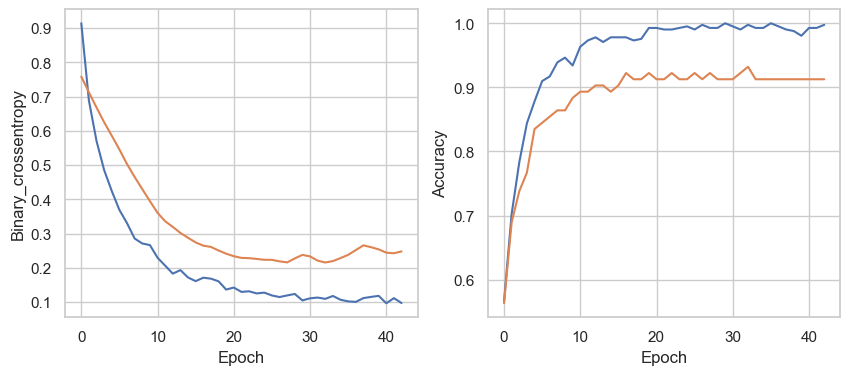

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8720 - loss: 0.2802
32 nodes, dropout 0, lr 0.001, batch size 64
Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4093 - loss: 1.1241 - val_accuracy: 0.5534 - val_loss: 0.8593 - learning_rate: 0.0010
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5506 - loss: 0.8523 - val_accuracy: 0.5825 - val_loss: 0.8329 - learning_rate: 0.0010
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6346 - loss: 0.7391 - val_accuracy: 0.6019 - val_loss: 0.8092 - learning_rate: 0.0010
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7492 - loss: 0.6474 - val_accuracy: 0.6019 - val_loss: 0.7865 - learning_rate: 0.0010
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8355 - loss: 0.5471 - val_accuracy: 0.6699 - val_loss: 0.7625 - learning_rate: 0.0010
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8239 - loss: 0.5166 - val_accuracy: 0.7087 - val_loss: 0.7387 - learning_ra

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9196 - loss: 0.2608  
32 nodes, dropout 0, lr 0.001, batch size 128
Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.4826 - loss: 0.9437 - val_accuracy: 0.6796 - val_loss: 0.7727 - learning_rate: 0.0010
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5319 - loss: 0.8566 - val_accuracy: 0.6699 - val_loss: 0.7632 - learning_rate: 0.0010
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5987 - loss: 0.7794 - val_accuracy: 0.7087 - val_loss: 0.7543 - learning_rate: 0.0010
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6881 - loss: 0.6977 - val_accuracy: 0.7282 - val_loss: 0.7457 - learning_rate: 0.0010
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7165 - loss: 0.6694 - val_accuracy: 0.7476 - val_loss: 0.7369 - learning_rate: 0.0010
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7854 - loss: 0.6016 - val_accuracy: 0.7476 - val_loss: 0.7281 - learni

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8631 - loss: 0.3390
32 nodes, dropout 0.2, lr 0.01, batch size 32
Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6315 - loss: 0.7886 - val_accuracy: 0.8350 - val_loss: 0.5400 - learning_rate: 0.0100
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8229 - loss: 0.4927 - val_accuracy: 0.8932 - val_loss: 0.4380 - learning_rate: 0.0100
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8954 - loss: 0.3282 - val_accuracy: 0.9126 - val_loss: 0.3565 - learning_rate: 0.0100
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9640 - loss: 0.2223 - val_accuracy: 0.9126 - val_loss: 0.3097 - learning_rate: 0.0100
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9675 - loss: 0.1852 - val_accuracy: 0.9417 - val_loss: 0.2363 - learning_rate: 0.0100
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9558 - loss: 0.1932 - val_accuracy: 0.9417 - val_loss: 0.2102 

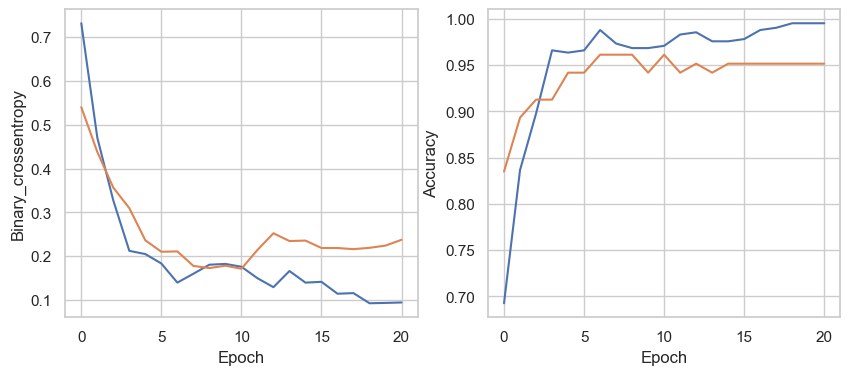

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9315 - loss: 0.2128
32 nodes, dropout 0.2, lr 0.01, batch size 64
Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6397 - loss: 0.8030 - val_accuracy: 0.8058 - val_loss: 0.6543 - learning_rate: 0.0100
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8464 - loss: 0.4630 - val_accuracy: 0.8252 - val_loss: 0.5459 - learning_rate: 0.0100
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9106 - loss: 0.3282 - val_accuracy: 0.8544 - val_loss: 0.4264 - learning_rate: 0.0100
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9426 - loss: 0.2622 - val_accuracy: 0.9223 - val_loss: 0.3295 - learning_rate: 0.0100
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9503 - loss: 0.2503 - val_accuracy: 0.9320 - val_loss: 0.2756 - learning_rate: 0.0100
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9786 - loss: 0.1713 - val_accuracy: 0.9320 - val_loss: 0.2530 - learning_r

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9420 - loss: 0.2142
32 nodes, dropout 0.2, lr 0.01, batch size 128
Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.4875 - loss: 1.0334 - val_accuracy: 0.7379 - val_loss: 0.7239 - learning_rate: 0.0100
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7164 - loss: 0.6739 - val_accuracy: 0.7573 - val_loss: 0.6888 - learning_rate: 0.0100
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7910 - loss: 0.5647 - val_accuracy: 0.7961 - val_loss: 0.6445 - learning_rate: 0.0100
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8135 - loss: 0.4970 - val_accuracy: 0.8252 - val_loss: 0.5887 - learning_rate: 0.0100
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8571 - loss: 0.4374 - val_accuracy: 0.8350 - val_loss: 0.5286 - learning_rate: 0.0100
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9026 - loss: 0.3464 - val_accuracy: 0.8641 - val_loss: 0.4688 - learning

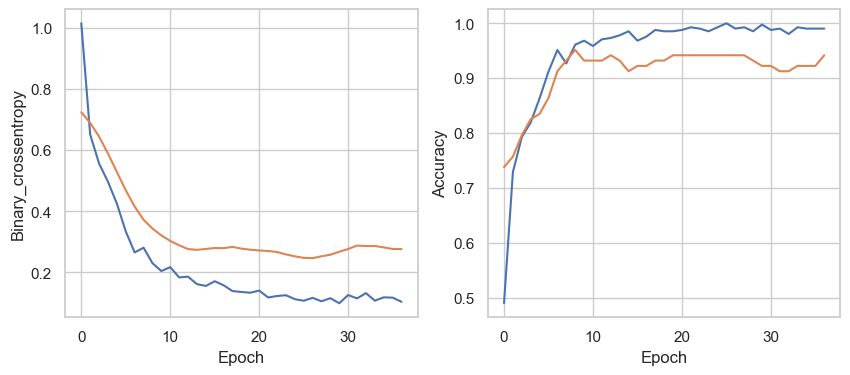

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9196 - loss: 0.2646
32 nodes, dropout 0.2, lr 0.005, batch size 32
Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6848 - loss: 0.7038 - val_accuracy: 0.6990 - val_loss: 0.6710 - learning_rate: 0.0050
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7812 - loss: 0.5722 - val_accuracy: 0.8738 - val_loss: 0.5714 - learning_rate: 0.0050
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8079 - loss: 0.5240 - val_accuracy: 0.9515 - val_loss: 0.4738 - learning_rate: 0.0050
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8642 - loss: 0.4009 - val_accuracy: 0.9612 - val_loss: 0.3912 - learning_rate: 0.0050
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9000 - loss: 0.3161 - val_accuracy: 0.9417 - val_loss: 0.3253 - learning_rate: 0.0050
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9345 - loss: 0.2756 - val_accuracy: 0.9515 - val_loss: 0.2680

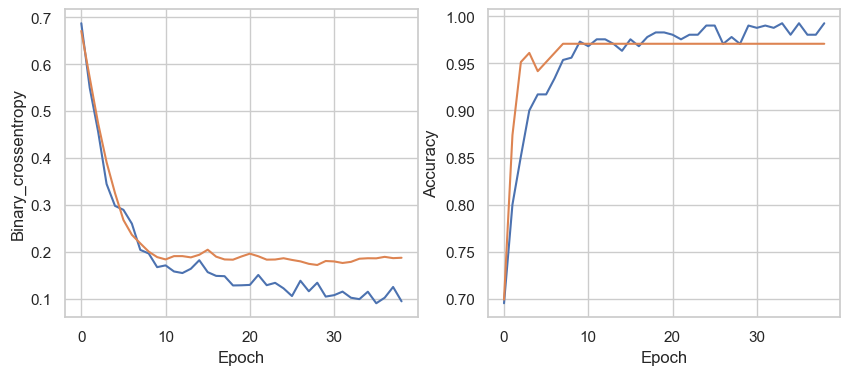

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9315 - loss: 0.2830
32 nodes, dropout 0.2, lr 0.005, batch size 64
Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5318 - loss: 0.8914 - val_accuracy: 0.6311 - val_loss: 0.7554 - learning_rate: 0.0050
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7325 - loss: 0.6669 - val_accuracy: 0.6990 - val_loss: 0.7064 - learning_rate: 0.0050
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8179 - loss: 0.5117 - val_accuracy: 0.7573 - val_loss: 0.6548 - learning_rate: 0.0050
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8587 - loss: 0.4259 - val_accuracy: 0.8252 - val_loss: 0.5940 - learning_rate: 0.0050
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8841 - loss: 0.3916 - val_accuracy: 0.8738 - val_loss: 0.5306 - learning_rate: 0.0050
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9294 - loss: 0.3054 - val_accuracy: 0.9029 - val_loss: 0.4669 - learning_

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8854 - loss: 0.2758  
32 nodes, dropout 0.2, lr 0.005, batch size 128
Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.4643 - loss: 1.1049 - val_accuracy: 0.4757 - val_loss: 0.7840 - learning_rate: 0.0050
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6689 - loss: 0.7137 - val_accuracy: 0.5825 - val_loss: 0.7418 - learning_rate: 0.0050
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7612 - loss: 0.6349 - val_accuracy: 0.7087 - val_loss: 0.7065 - learning_rate: 0.0050
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7767 - loss: 0.5749 - val_accuracy: 0.7573 - val_loss: 0.6705 - learning_rate: 0.0050
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7930 - loss: 0.5214 - val_accuracy: 0.7961 - val_loss: 0.6310 - learning_rate: 0.0050
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8520 - loss: 0.4371 - val_accuracy: 0.8155 - val_loss: 0.5898 - learn

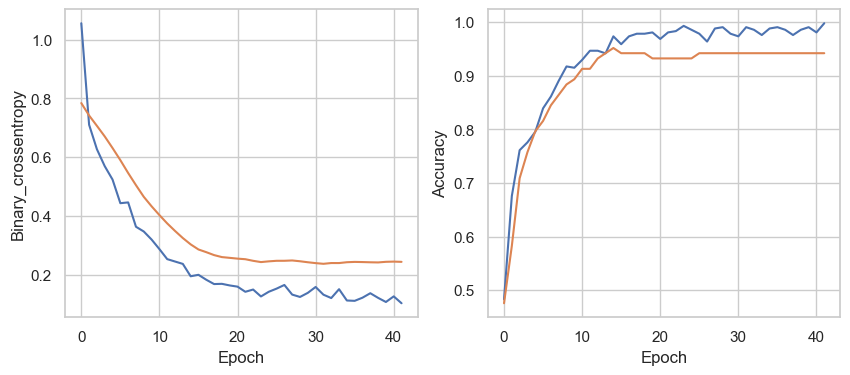

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8854 - loss: 0.2780 
32 nodes, dropout 0.2, lr 0.001, batch size 32
Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5668 - loss: 0.9845 - val_accuracy: 0.5437 - val_loss: 0.7842 - learning_rate: 0.0010
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5776 - loss: 0.9299 - val_accuracy: 0.6699 - val_loss: 0.7539 - learning_rate: 0.0010
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6468 - loss: 0.7471 - val_accuracy: 0.6990 - val_loss: 0.7288 - learning_rate: 0.0010
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6871 - loss: 0.7037 - val_accuracy: 0.6602 - val_loss: 0.7078 - learning_rate: 0.0010
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6961 - loss: 0.6942 - val_accuracy: 0.6505 - val_loss: 0.6875 - learning_rate: 0.0010
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7534 - loss: 0.6379 - val_accuracy: 0.6893 - val_loss: 0.668

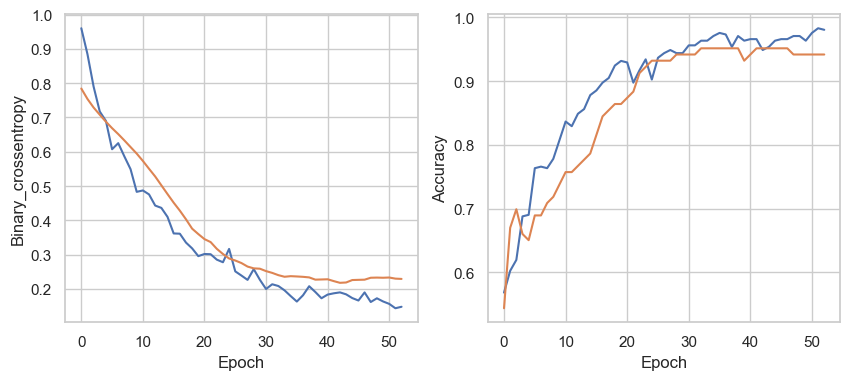

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9092 - loss: 0.3123
32 nodes, dropout 0.2, lr 0.001, batch size 64
Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5254 - loss: 0.9447 - val_accuracy: 0.5922 - val_loss: 0.7780 - learning_rate: 0.0010
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5753 - loss: 0.8973 - val_accuracy: 0.6505 - val_loss: 0.7562 - learning_rate: 0.0010
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6751 - loss: 0.7465 - val_accuracy: 0.7476 - val_loss: 0.7354 - learning_rate: 0.0010
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6556 - loss: 0.7665 - val_accuracy: 0.7670 - val_loss: 0.7128 - learning_rate: 0.0010
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7128 - loss: 0.6846 - val_accuracy: 0.7670 - val_loss: 0.6922 - learning_rate: 0.0010
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7240 - loss: 0.6884 - val_accuracy: 0.7961 - val_loss: 0.6728 - learning_

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9196 - loss: 0.2467  
32 nodes, dropout 0.2, lr 0.001, batch size 128
Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.5627 - loss: 0.8971 - val_accuracy: 0.4466 - val_loss: 0.8161 - learning_rate: 0.0010
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5329 - loss: 0.8963 - val_accuracy: 0.4660 - val_loss: 0.8042 - learning_rate: 0.0010
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6135 - loss: 0.7934 - val_accuracy: 0.4951 - val_loss: 0.7936 - learning_rate: 0.0010
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6323 - loss: 0.7911 - val_accuracy: 0.5340 - val_loss: 0.7835 - learning_rate: 0.0010
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6305 - loss: 0.8098 - val_accuracy: 0.5922 - val_loss: 0.7740 - learning_rate: 0.0010
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6392 - loss: 0.7777 - val_accuracy: 0.6699 - val_loss: 0.7654 - learni

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9881 - loss: 0.1919
64 nodes, dropout 0, lr 0.01, batch size 32
Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7242 - loss: 0.7291 - val_accuracy: 0.9126 - val_loss: 0.5286 - learning_rate: 0.0100
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9510 - loss: 0.3069 - val_accuracy: 0.9417 - val_loss: 0.3769 - learning_rate: 0.0100
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9882 - loss: 0.2270 - val_accuracy: 0.9515 - val_loss: 0.3442 - learning_rate: 0.0100
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9887 - loss: 0.2185 - val_accuracy: 0.9612 - val_loss: 0.2992 - learning_rate: 0.0100
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9956 - loss: 0.1905 - val_accuracy: 0.9612 - val_loss: 0.3015 - learning_rate: 0.0100
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9927 - loss: 0.1876 - val_accuracy: 0.9515 - val_loss: 0.3208 - 

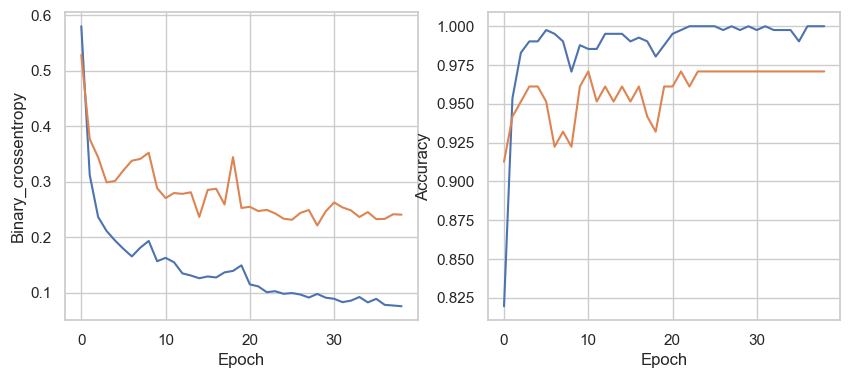

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9077 - loss: 0.3320  
64 nodes, dropout 0, lr 0.01, batch size 64
Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6870 - loss: 0.7592 - val_accuracy: 0.8932 - val_loss: 0.6145 - learning_rate: 0.0100
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9561 - loss: 0.2945 - val_accuracy: 0.9029 - val_loss: 0.4517 - learning_rate: 0.0100
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9861 - loss: 0.2236 - val_accuracy: 0.9029 - val_loss: 0.3794 - learning_rate: 0.0100
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9815 - loss: 0.2144 - val_accuracy: 0.9029 - val_loss: 0.3834 - learning_rate: 0.0100
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9916 - loss: 0.1932 - val_accuracy: 0.9029 - val_loss: 0.3574 - learning_rate: 0.0100
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9987 - loss: 0.1720 - val_accuracy: 0.8835 - val_loss: 0.3766 - learning_r

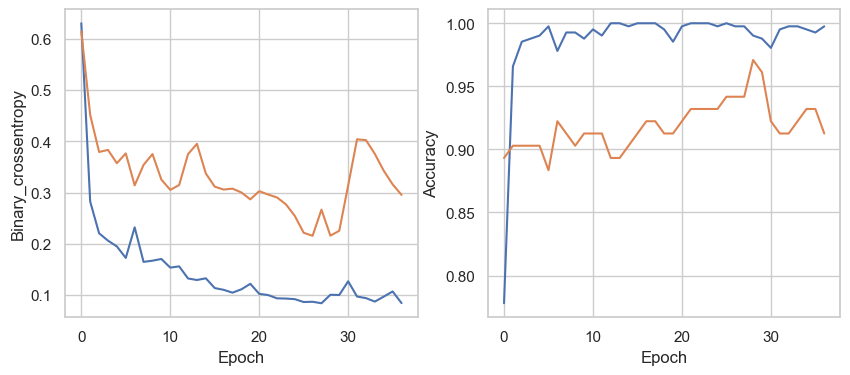

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8512 - loss: 0.2972
64 nodes, dropout 0, lr 0.01, batch size 128
Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.6689 - loss: 0.8105 - val_accuracy: 0.8252 - val_loss: 0.6642 - learning_rate: 0.0100
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9488 - loss: 0.3271 - val_accuracy: 0.9029 - val_loss: 0.5370 - learning_rate: 0.0100
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9779 - loss: 0.2361 - val_accuracy: 0.9126 - val_loss: 0.4729 - learning_rate: 0.0100
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9829 - loss: 0.2306 - val_accuracy: 0.9320 - val_loss: 0.4085 - learning_rate: 0.0100
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9977 - loss: 0.1897 - val_accuracy: 0.9515 - val_loss: 0.3450 - learning_rate: 0.0100
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9980 - loss: 0.1801 - val_accuracy: 0.9417 - val_loss: 0.3156 - learning_ra

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9315 - loss: 0.2871
64 nodes, dropout 0, lr 0.005, batch size 32
Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6792 - loss: 0.7665 - val_accuracy: 0.9029 - val_loss: 0.6421 - learning_rate: 0.0050
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9417 - loss: 0.3202 - val_accuracy: 0.9320 - val_loss: 0.5010 - learning_rate: 0.0050
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9982 - loss: 0.2190 - val_accuracy: 0.9223 - val_loss: 0.4085 - learning_rate: 0.0050
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9875 - loss: 0.2048 - val_accuracy: 0.9320 - val_loss: 0.3713 - learning_rate: 0.0050
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9863 - loss: 0.2023 - val_accuracy: 0.9320 - val_loss: 0.3454 - learning_rate: 0.0050
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9997 - loss: 0.1701 - val_accuracy: 0.9320 - val_loss: 0.3515 -

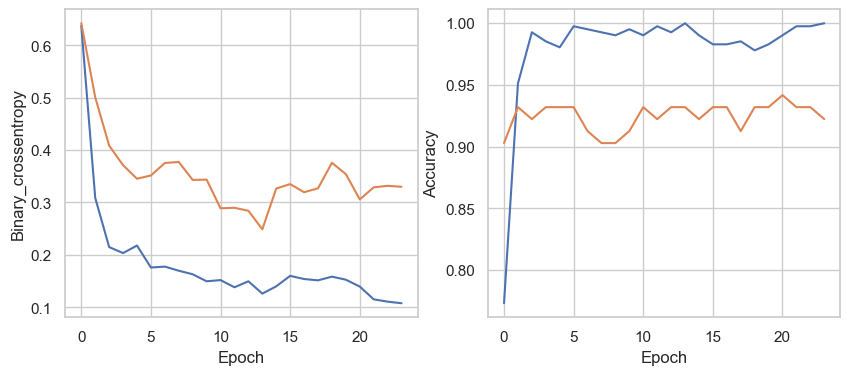

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9211 - loss: 0.3941
64 nodes, dropout 0, lr 0.005, batch size 64
Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6399 - loss: 0.8565 - val_accuracy: 0.8544 - val_loss: 0.7377 - learning_rate: 0.0050
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9128 - loss: 0.3938 - val_accuracy: 0.8738 - val_loss: 0.6460 - learning_rate: 0.0050
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9746 - loss: 0.2658 - val_accuracy: 0.8835 - val_loss: 0.5697 - learning_rate: 0.0050
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9862 - loss: 0.2255 - val_accuracy: 0.8835 - val_loss: 0.4926 - learning_rate: 0.0050
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9948 - loss: 0.2009 - val_accuracy: 0.9029 - val_loss: 0.4435 - learning_rate: 0.0050
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9991 - loss: 0.1870 - val_accuracy: 0.9029 - val_loss: 0.4124 - learning_r

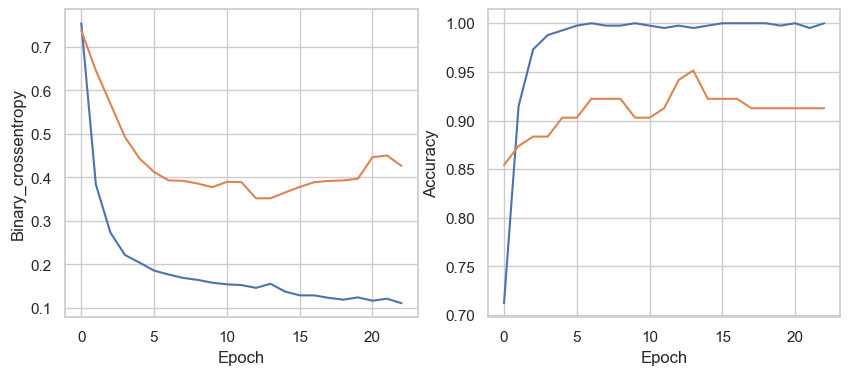

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9196 - loss: 0.2840
64 nodes, dropout 0, lr 0.005, batch size 128
Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5720 - loss: 1.0093 - val_accuracy: 0.8252 - val_loss: 0.7342 - learning_rate: 0.0050
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9217 - loss: 0.4271 - val_accuracy: 0.8350 - val_loss: 0.6795 - learning_rate: 0.0050
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9492 - loss: 0.3170 - val_accuracy: 0.8641 - val_loss: 0.6395 - learning_rate: 0.0050
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9666 - loss: 0.2619 - val_accuracy: 0.8932 - val_loss: 0.5905 - learning_rate: 0.0050
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9786 - loss: 0.2335 - val_accuracy: 0.9126 - val_loss: 0.5391 - learning_rate: 0.0050
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9962 - loss: 0.2027 - val_accuracy: 0.9126 - val_loss: 0.4934 - learning_

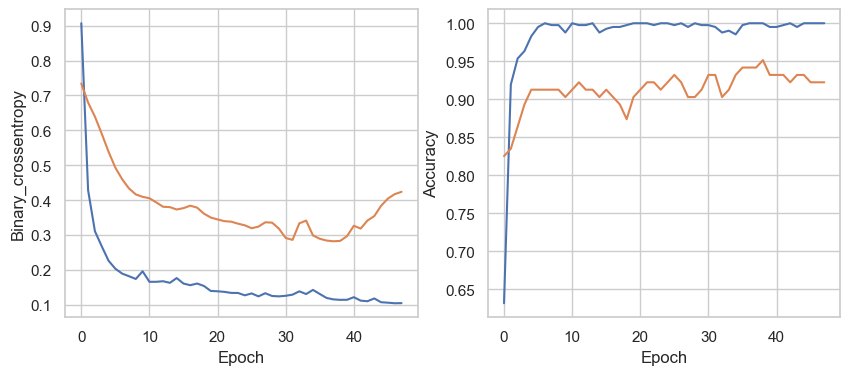

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9211 - loss: 0.3019 
64 nodes, dropout 0, lr 0.001, batch size 32
Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5173 - loss: 1.0272 - val_accuracy: 0.6019 - val_loss: 0.8249 - learning_rate: 0.0010
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7718 - loss: 0.6581 - val_accuracy: 0.7767 - val_loss: 0.7679 - learning_rate: 0.0010
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8385 - loss: 0.5314 - val_accuracy: 0.8252 - val_loss: 0.7172 - learning_rate: 0.0010
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9009 - loss: 0.4581 - val_accuracy: 0.8350 - val_loss: 0.6704 - learning_rate: 0.0010
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9381 - loss: 0.3830 - val_accuracy: 0.8544 - val_loss: 0.6188 - learning_rate: 0.0010
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9652 - loss: 0.3124 - val_accuracy: 0.8738 - val_loss: 0.5716 

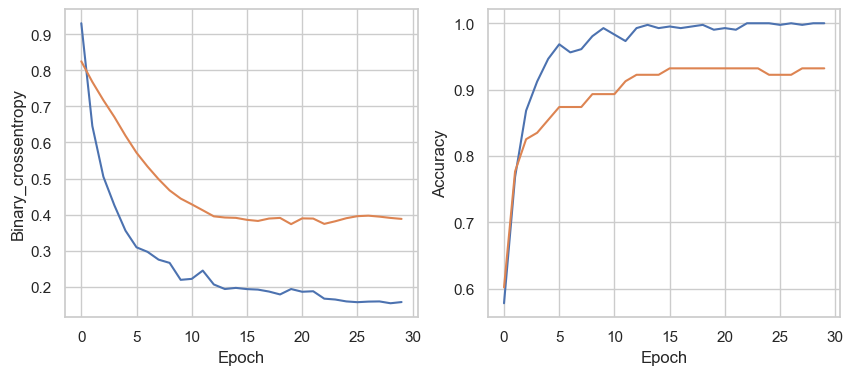

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8631 - loss: 0.4449  
64 nodes, dropout 0, lr 0.001, batch size 64
Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4000 - loss: 1.1744 - val_accuracy: 0.5922 - val_loss: 0.8387 - learning_rate: 0.0010
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6778 - loss: 0.7517 - val_accuracy: 0.6699 - val_loss: 0.8008 - learning_rate: 0.0010
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8742 - loss: 0.5574 - val_accuracy: 0.6699 - val_loss: 0.7749 - learning_rate: 0.0010
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9262 - loss: 0.4665 - val_accuracy: 0.7379 - val_loss: 0.7483 - learning_rate: 0.0010
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9419 - loss: 0.4139 - val_accuracy: 0.7670 - val_loss: 0.7197 - learning_rate: 0.0010
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9248 - loss: 0.3929 - val_accuracy: 0.8252 - val_loss: 0.6909 - learning_

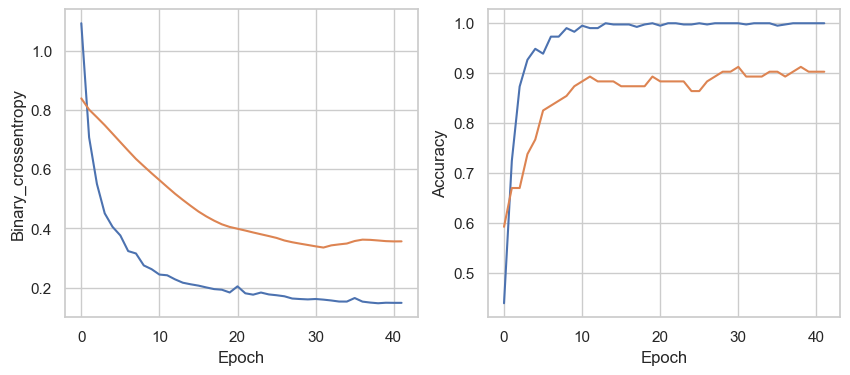

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8274 - loss: 0.4137
64 nodes, dropout 0, lr 0.001, batch size 128
Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5550 - loss: 0.9505 - val_accuracy: 0.7573 - val_loss: 0.7881 - learning_rate: 0.0010
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7215 - loss: 0.7263 - val_accuracy: 0.8058 - val_loss: 0.7629 - learning_rate: 0.0010
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8279 - loss: 0.6113 - val_accuracy: 0.8058 - val_loss: 0.7399 - learning_rate: 0.0010
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8810 - loss: 0.5307 - val_accuracy: 0.8447 - val_loss: 0.7172 - learning_rate: 0.0010
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9054 - loss: 0.4771 - val_accuracy: 0.8641 - val_loss: 0.6944 - learning_rate: 0.0010
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9440 - loss: 0.4051 - val_accuracy: 0.9029 - val_loss: 0.6712 - learning_r

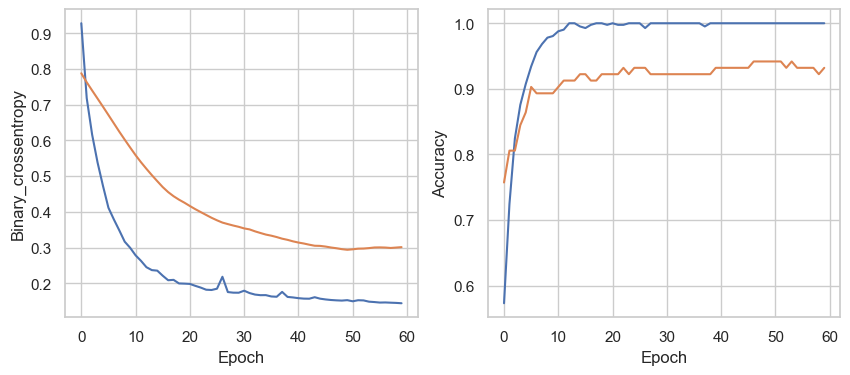

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9092 - loss: 0.3239
64 nodes, dropout 0.2, lr 0.01, batch size 32
Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7655 - loss: 0.7421 - val_accuracy: 0.9126 - val_loss: 0.5334 - learning_rate: 0.0100
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9235 - loss: 0.3619 - val_accuracy: 0.9515 - val_loss: 0.3894 - learning_rate: 0.0100
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9587 - loss: 0.3077 - val_accuracy: 0.9223 - val_loss: 0.3675 - learning_rate: 0.0100
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9669 - loss: 0.2623 - val_accuracy: 0.9320 - val_loss: 0.3322 - learning_rate: 0.0100
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9681 - loss: 0.2975 - val_accuracy: 0.9223 - val_loss: 0.3577 - learning_rate: 0.0100
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9788 - loss: 0.2391 - val_accuracy: 0.9320 - val_loss: 0.3494 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8631 - loss: 0.3106
64 nodes, dropout 0.2, lr 0.01, batch size 64
Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6714 - loss: 0.8128 - val_accuracy: 0.6602 - val_loss: 0.7276 - learning_rate: 0.0100
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8894 - loss: 0.3977 - val_accuracy: 0.8544 - val_loss: 0.5516 - learning_rate: 0.0100
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9403 - loss: 0.3551 - val_accuracy: 0.9029 - val_loss: 0.4484 - learning_rate: 0.0100
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9658 - loss: 0.2693 - val_accuracy: 0.8932 - val_loss: 0.4181 - learning_rate: 0.0100
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9694 - loss: 0.2693 - val_accuracy: 0.8932 - val_loss: 0.4098 - learning_rate: 0.0100
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9734 - loss: 0.2538 - val_accuracy: 0.9223 - val_loss: 0.3601 - learning_r

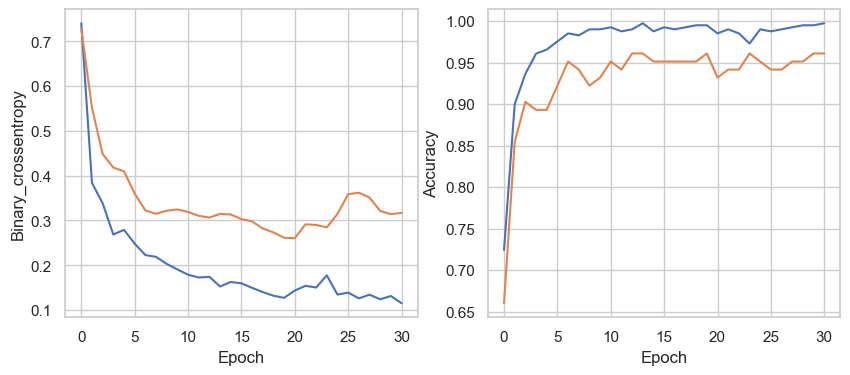

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9077 - loss: 0.3260
64 nodes, dropout 0.2, lr 0.01, batch size 128
Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5901 - loss: 0.9037 - val_accuracy: 0.8155 - val_loss: 0.7365 - learning_rate: 0.0100
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8377 - loss: 0.5021 - val_accuracy: 0.8641 - val_loss: 0.6060 - learning_rate: 0.0100
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9303 - loss: 0.3709 - val_accuracy: 0.9417 - val_loss: 0.4885 - learning_rate: 0.0100
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9506 - loss: 0.3137 - val_accuracy: 0.9515 - val_loss: 0.4324 - learning_rate: 0.0100
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9531 - loss: 0.2850 - val_accuracy: 0.9417 - val_loss: 0.4000 - learning_rate: 0.0100
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9788 - loss: 0.2584 - val_accuracy: 0.9320 - val_loss: 0.3730 - learning_

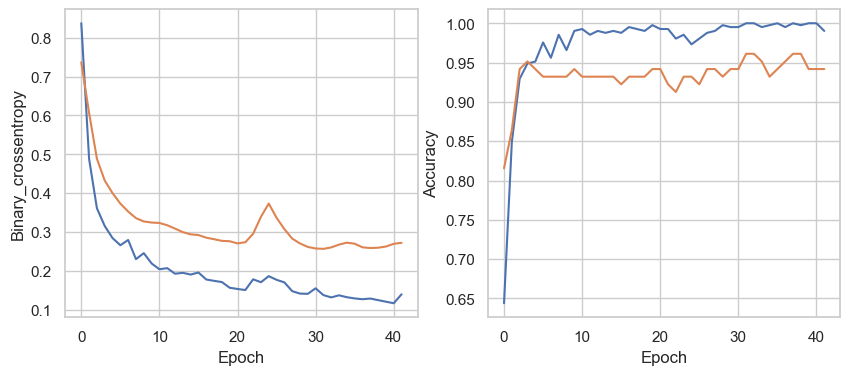

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9658 - loss: 0.2472
64 nodes, dropout 0.2, lr 0.005, batch size 32
Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6391 - loss: 0.8324 - val_accuracy: 0.8058 - val_loss: 0.6986 - learning_rate: 0.0050
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8800 - loss: 0.4620 - val_accuracy: 0.9126 - val_loss: 0.5649 - learning_rate: 0.0050
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9331 - loss: 0.3588 - val_accuracy: 0.9320 - val_loss: 0.4568 - learning_rate: 0.0050
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9636 - loss: 0.2926 - val_accuracy: 0.9417 - val_loss: 0.3722 - learning_rate: 0.0050
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9516 - loss: 0.2745 - val_accuracy: 0.9417 - val_loss: 0.3319 - learning_rate: 0.0050
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9802 - loss: 0.2440 - val_accuracy: 0.9320 - val_loss: 0.3148

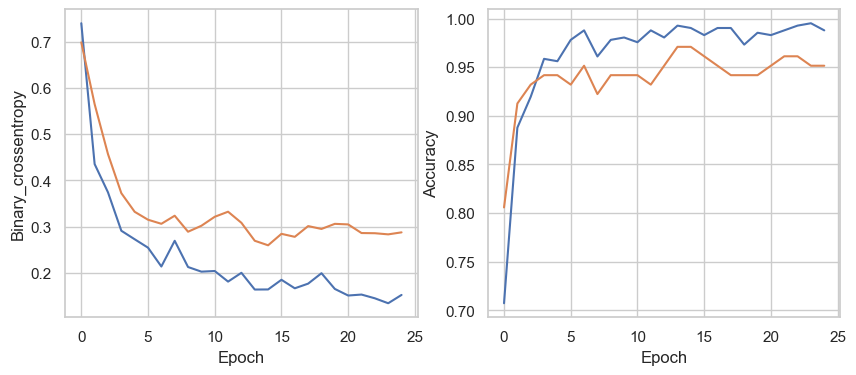

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9539 - loss: 0.2252  
64 nodes, dropout 0.2, lr 0.005, batch size 64
Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5989 - loss: 0.9633 - val_accuracy: 0.6699 - val_loss: 0.7465 - learning_rate: 0.0050
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8526 - loss: 0.5069 - val_accuracy: 0.8641 - val_loss: 0.6218 - learning_rate: 0.0050
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9269 - loss: 0.3774 - val_accuracy: 0.9126 - val_loss: 0.5102 - learning_rate: 0.0050
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9515 - loss: 0.2965 - val_accuracy: 0.9223 - val_loss: 0.4406 - learning_rate: 0.0050
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9738 - loss: 0.2384 - val_accuracy: 0.9417 - val_loss: 0.3901 - learning_rate: 0.0050
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9699 - loss: 0.2622 - val_accuracy: 0.9320 - val_loss: 0.3556 - learni

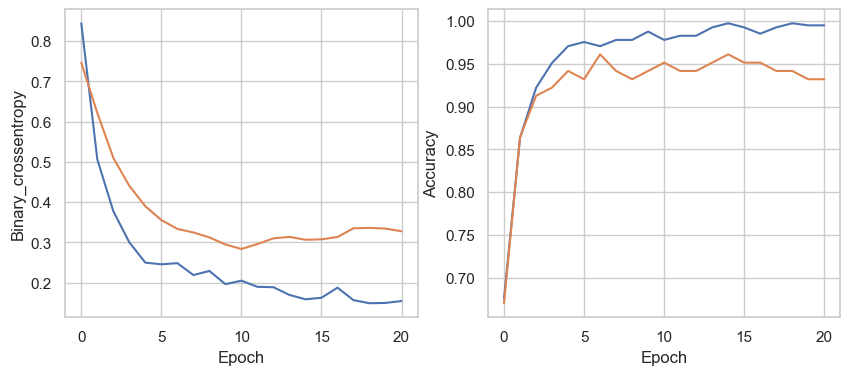

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9196 - loss: 0.3025  
64 nodes, dropout 0.2, lr 0.005, batch size 128
Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.6179 - loss: 0.8697 - val_accuracy: 0.7379 - val_loss: 0.7630 - learning_rate: 0.0050
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8903 - loss: 0.4800 - val_accuracy: 0.7961 - val_loss: 0.6902 - learning_rate: 0.0050
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9339 - loss: 0.3959 - val_accuracy: 0.8738 - val_loss: 0.6140 - learning_rate: 0.0050
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9401 - loss: 0.3403 - val_accuracy: 0.9029 - val_loss: 0.5519 - learning_rate: 0.0050
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9619 - loss: 0.2840 - val_accuracy: 0.8932 - val_loss: 0.5006 - learning_rate: 0.0050
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9635 - loss: 0.2584 - val_accuracy: 0.8932 - val_loss: 0.4662 - learni

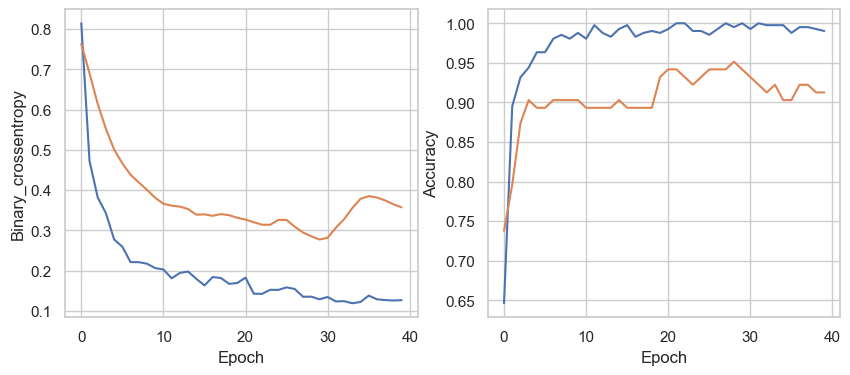

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9092 - loss: 0.3224  
64 nodes, dropout 0.2, lr 0.001, batch size 32
Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5384 - loss: 1.0544 - val_accuracy: 0.7184 - val_loss: 0.8076 - learning_rate: 0.0010
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7634 - loss: 0.6865 - val_accuracy: 0.8155 - val_loss: 0.7581 - learning_rate: 0.0010
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7834 - loss: 0.6262 - val_accuracy: 0.8350 - val_loss: 0.7046 - learning_rate: 0.0010
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8449 - loss: 0.5107 - val_accuracy: 0.8252 - val_loss: 0.6518 - learning_rate: 0.0010
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8799 - loss: 0.4494 - val_accuracy: 0.8252 - val_loss: 0.6029 - learning_rate: 0.0010
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8927 - loss: 0.4173 - val_accuracy: 0.8544 - val_loss: 0.54

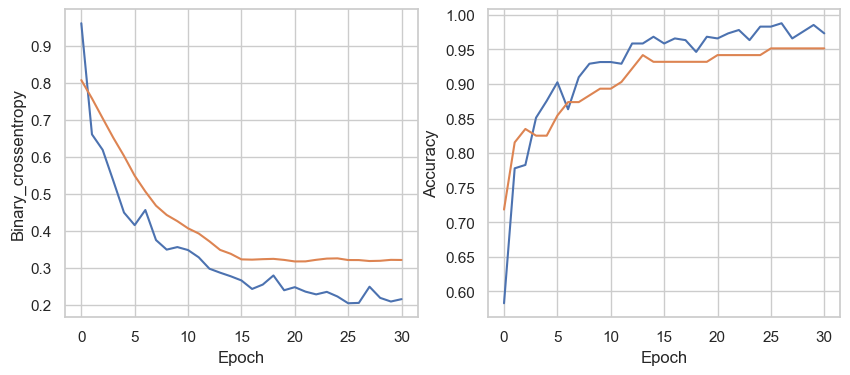

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9211 - loss: 0.3525  
64 nodes, dropout 0.2, lr 0.001, batch size 64
Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5487 - loss: 0.9385 - val_accuracy: 0.5631 - val_loss: 0.8297 - learning_rate: 0.0010
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6939 - loss: 0.7657 - val_accuracy: 0.6990 - val_loss: 0.7954 - learning_rate: 0.0010
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7987 - loss: 0.6337 - val_accuracy: 0.8058 - val_loss: 0.7591 - learning_rate: 0.0010
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8163 - loss: 0.5897 - val_accuracy: 0.8350 - val_loss: 0.7240 - learning_rate: 0.0010
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8449 - loss: 0.5545 - val_accuracy: 0.8252 - val_loss: 0.6895 - learning_rate: 0.0010
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9051 - loss: 0.4648 - val_accuracy: 0.8447 - val_loss: 0.6541 - learnin

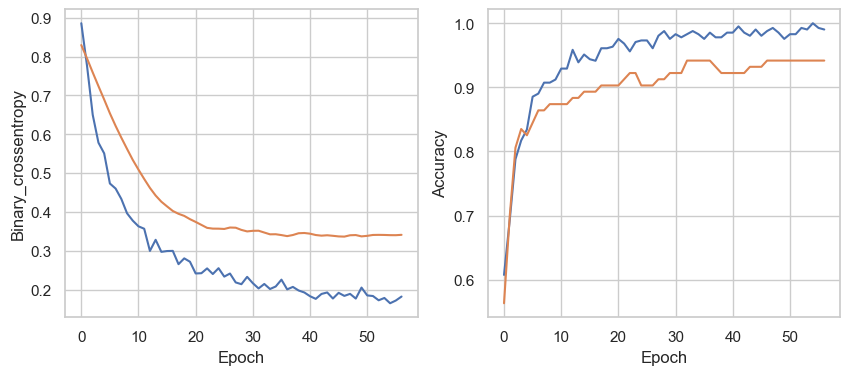

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9301 - loss: 0.2801  
64 nodes, dropout 0.2, lr 0.001, batch size 128
Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5077 - loss: 1.1514 - val_accuracy: 0.5340 - val_loss: 0.8586 - learning_rate: 0.0010
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5543 - loss: 1.0386 - val_accuracy: 0.5922 - val_loss: 0.8362 - learning_rate: 0.0010
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6337 - loss: 0.8595 - val_accuracy: 0.6311 - val_loss: 0.8156 - learning_rate: 0.0010
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6906 - loss: 0.7973 - val_accuracy: 0.7379 - val_loss: 0.7965 - learning_rate: 0.0010
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7150 - loss: 0.7787 - val_accuracy: 0.8155 - val_loss: 0.7769 - learning_rate: 0.0010
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7857 - loss: 0.6511 - val_accuracy: 0.8447 - val_loss: 0.7595 - learni

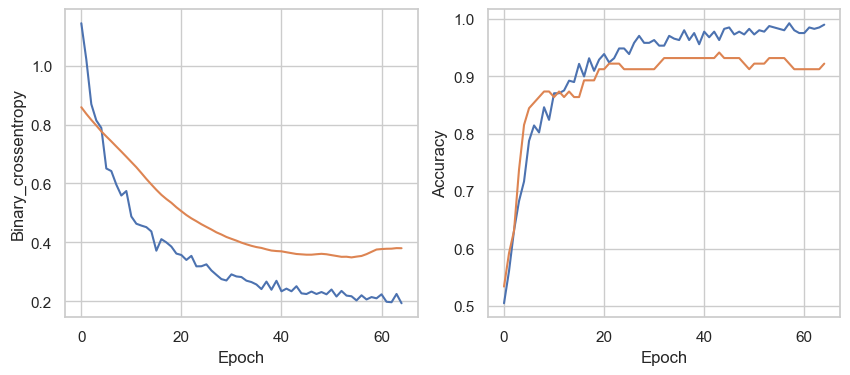

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9315 - loss: 0.3270


In [717]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f'{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}')
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_test, y_test)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model



In [718]:
y_pred = least_loss_model.predict(X_test)
print(y_pred)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,) #reshape to one dimension
print(y_pred)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[[0.9868233 ]
 [0.9956962 ]
 [0.0128202 ]
 [0.12132341]
 [0.45611805]
 [0.98986834]
 [0.02369986]
 [0.00672748]
 [0.00431268]
 [0.99917656]
 [0.6457123 ]
 [0.99846697]
 [0.05108412]
 [0.00594871]
 [0.9349191 ]
 [0.00777834]
 [0.00797975]
 [0.00847951]
 [0.00402106]
 [0.9879082 ]
 [0.08418222]
 [0.00294034]
 [0.03699373]
 [0.02324586]
 [0.00316752]
 [0.02200792]
 [0.00557903]
 [0.00780203]
 [0.00336216]
 [0.9999902 ]
 [0.00588637]
 [0.00291711]
 [0.0021822 ]
 [0.00974509]
 [0.00805883]
 [0.49425554]
 [0.2080449 ]
 [0.30383056]
 [0.04921807]
 [0.9997348 ]
 [0.00969016]
 [0.01112049]
 [0.86791515]
 [0.9967892 ]
 [0.9999962 ]
 [0.0034818 ]
 [0.7774123 ]
 [0.9967658 ]
 [0.06508745]
 [0.98743236]
 [0.01057851]
 [0.08435944]
 [0.05510069]
 [0.00843683]
 [0.99694645]
 [0.00799671]]
[1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0]


In [721]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
print(classification_report(y_test, y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        37
           1       1.00      0.89      0.94        19

    accuracy                           0.96        56
   macro avg       0.97      0.95      0.96        56
weighted avg       0.97      0.96      0.96        56

